<h1> Data Preparation </h1>

In [ ]:
import numpy as np
np.set_printoptions(linewidth=80)

import pandas as pd
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 20)
pd.set_option('display.max_colwidth', 100)
from pandas.io.json import json_normalize

import datetime
import json
import ast
import csv
import ast
from datetime import date

from geopy.geocoders import Nominatim

import imblearn
from imblearn.over_sampling import SMOTENC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, auc, \
roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''from google.colab import files
click_stream.to_csv('click_stream.csv', index=False) 
files.download('click_stream.csv')
'''



"from google.colab import files\nclick_stream.to_csv('click_stream.csv', index=False) \nfiles.download('click_stream.csv')\n"

In [ ]:
#transactions = pd.read_csv("/content/drive/MyDrive/Datasets/transactions2.csv", converters={'product_metadata': ast.literal_eval})
#click_stream = pd.read_csv('/content/drive/MyDrive/Datasets/click_stream2.csv', converters={'event_metadata': ast.literal_eval})

In [ ]:
# customer and product, from folder Mockup Datasets
# transactions and click_stream, from folder Datasets

product = pd.read_csv("/content/drive/MyDrive/Mockup Datasets/product.csv", 
                      on_bad_lines='warn')

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [ ]:
customer = pd.read_csv("/content/drive/MyDrive/Mockup Datasets/customer.csv")

In [ ]:
transactions = pd.read_csv("/content/drive/MyDrive/Mockup Datasets/transactions.csv",
                           parse_dates=['created_at', 'shipment_date_limit'])

In [ ]:
click_stream = pd.read_csv('/content/drive/MyDrive/Mockup Datasets/click_stream.csv')

In [ ]:
product.shape

(44424, 10)

Untuk dataset product, terdapat beberapa rows yang memiliki 11 columns (default columns = 10). Ketika rows tersebut di skip, ternyata rows yang bermasalah adalah sekitar 22 (dihitung dari warning) dari 44446 rows secara keseluruhan. Oleh karena itu, rows yang bermasalah kami drop karena tidak terlalu memengaruhi kualitas dataset.

In [ ]:
customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupcampus.id,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfoundation.org,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupcampus.id,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfoundation.org,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupcampus.id,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [ ]:
transactions.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_price': 191247}]",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_price': 145526}]",Credit Card,Success,0,NaN,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_price': 135174}]",OVO,Success,0,NaN,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_price': 271012}]",Credit Card,Success,0,NaN,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_price': 198753}]",Credit Card,Success,0,NaN,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753


In [ ]:
product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
click_stream.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_price': 313529}"
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [ ]:
customer.shape

(100000, 15)

In [ ]:
transactions.shape

(852584, 14)

In [ ]:
product.shape

(44424, 10)

In [ ]:
click_stream.shape

(12833602, 6)

In [ ]:
customer.columns

Index(['customer_id', 'first_name', 'last_name', 'username', 'email', 'gender',
       'birthdate', 'device_type', 'device_id', 'device_version',
       'home_location_lat', 'home_location_long', 'home_location',
       'home_country', 'first_join_date'],
      dtype='object')

In [ ]:
transactions.columns

Index(['created_at', 'customer_id', 'booking_id', 'session_id',
       'product_metadata', 'payment_method', 'payment_status', 'promo_amount',
       'promo_code', 'shipment_fee', 'shipment_date_limit',
       'shipment_location_lat', 'shipment_location_long', 'total_amount'],
      dtype='object')

In [ ]:
product.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [ ]:
click_stream.columns

Index(['session_id', 'event_name', 'event_time', 'event_id', 'traffic_source',
       'event_metadata'],
      dtype='object')

In [ ]:
customer2 = customer.copy()
transactions2 = transactions.copy()

<h1> Week 1: Exploratory Data Analysis </h1>

memberikan insight untuk tim UI/UX

<h2> Dataset customer </h2>

<h3> Banyaknya customer yang pernah membeli </h3>

In [ ]:
cust_payment_success = transactions2[['customer_id', 'payment_status']][transactions['payment_status']=='Success']
cust_payment_success = cust_payment_success['customer_id'].unique()

In [ ]:
cust_all = customer2['customer_id']

In [ ]:
cust_have_payment = len(cust_payment_success) / 100000
cust_not_have_payment = 1 - cust_have_payment

In [ ]:
print('Registered Customers:', len(customer['customer_id']), 'customers')
print('Customers have purchased at least 1 item:', int(cust_have_payment*100000), 'customers')
print('Customers never purchase yet:', int(cust_not_have_payment*100000), 'customers')

Registered Customers: 100000 customers
Customers have purchased at least 1 item: 50242 customers
Customers never purchase yet: 49758 customers


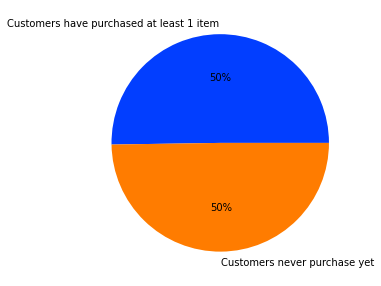

In [ ]:
# declaring data
data = [cust_have_payment, cust_not_have_payment]
keys = ['Customers have purchased at least 1 item', 'Customers never purchase yet']
  
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.figure(figsize=(10, 5))
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('')
  
# displaying chart

plt.show()

<h3> Jenis kelamin customer</h3>

Text(0.5, 1.0, 'Jenis Kelamin Customer')

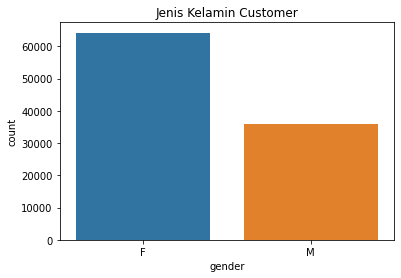

In [ ]:
sns.countplot(data=customer, x='gender')
plt.title("Jenis Kelamin Customer")

Kebanyakan jenis kelamin customer adalah wanita



<h3> Tipe Perangkat yang dimiliki Customer </h3>


Text(0.5, 1.0, 'Tipe Perangkat yang dimiliki Customer')

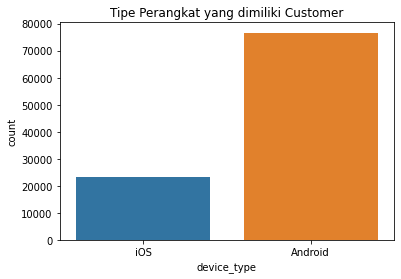

In [ ]:
sns.countplot(data=customer, x='device_type')
plt.title("Tipe Perangkat yang dimiliki Customer")

Perangkat Android lebih banyak dimiliki oleh Customer daripada iOS

<h3> Umur customer </h3>

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
birthdate_year = pd.to_datetime(customer['birthdate'], format='%Y-%m-%d').dt.year

In [ ]:
customer['age'] = date.today().year - birthdate_year

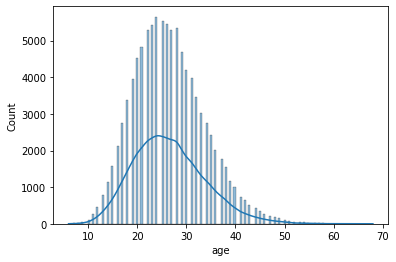

In [ ]:
sns.histplot(data=customer, x=customer['age'], kde=True)

terlihat bahwa kebanyakan customer memiliki umur sekitar 20-30 tahun

<h3> Asal kota customer </h3>

In [ ]:
customer['home_country'].unique()

array(['Indonesia'], dtype=object)

Semua customer berasal dari Indonesia

In [ ]:
top_10_city = customer['home_location'].value_counts().head(10)

Text(0.5, 1.0, '10 Besar Asal Kota Customer')

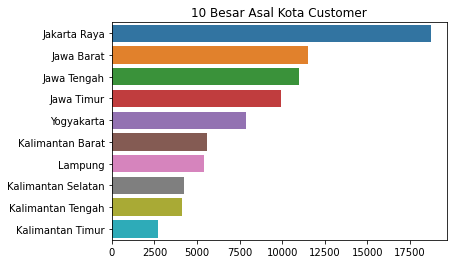

In [ ]:
sns.barplot(x=top_10_city.values, y=top_10_city.index)
plt.title("10 Besar Asal Kota Customer")

terlihat bahwa asal kota customer terbesar berasal dari Jakarta Raya, kemudian Jawa Barat dan Jawa Tengah

<h2> Dataset transactions </h2>

<h3> Metode Pembayaran </h3>

In [ ]:
pm = transactions['payment_method'].value_counts().head()

Text(0.5, 1.0, 'Metode Pembayaran')

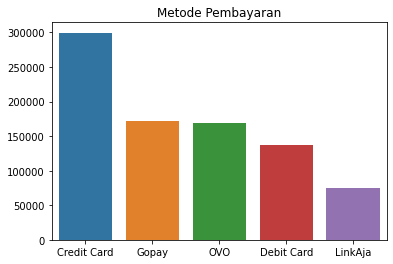

In [ ]:
sns.barplot(x=pm.index, y=pm.values)
plt.title("Metode Pembayaran")

metode pembayaran terbanyak oleh customer menggunakan credit card, kemudian Gopay dan OVO

<h3> Promo </h3>

In [ ]:
promo_count = transactions.groupby(['customer_id']).agg({'promo_code': 'count'})
promo_count['promo_code'].sum()

326536

In [ ]:
promo = transactions['promo_code'].shape[0]

In [ ]:
promo_not_null = (promo_count['promo_code'].sum()/promo) * 100
promo_null = 100 - promo_not_null

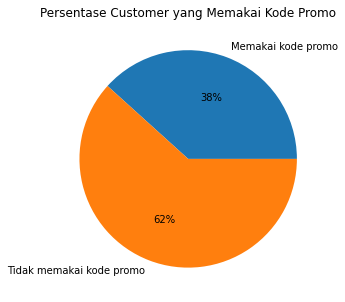

In [ ]:
shares = [promo_not_null, promo_null]
labels = ["Memakai kode promo", "Tidak memakai kode promo"]

plt.figure(figsize=(10, 5))
plt.pie(shares, labels = labels, autopct='%.0f%%')
plt.title("Persentase Customer yang Memakai Kode Promo")
plt.show()

Hal yang unik adalah persentase customer yang menggunakan kode promo adalah sekitar 38%, sehingga dapat dikatakan promo kurang diminati customer. Namun, perlu juga disertai dengan analisis lainnya

<h2> Dataset product </h2>

Note: Analisis dataset produk ini adalah produk yang ditawarkan, BUKAN produk yang dibeli oleh customer

<h3> Jenis Produk yang Ditawarkan (Jenis Kelamin) </h3>

In [ ]:
product_supply = product['gender'].value_counts()
product_supply

Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: gender, dtype: int64

Text(0.5, 1.0, 'Jenis Produk yang Ditawarkan (Jenis Kelamin)')

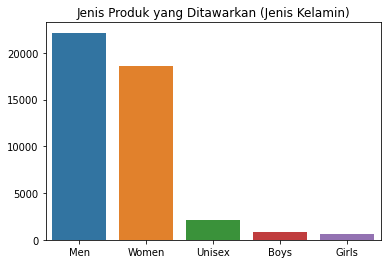

In [ ]:
sns.barplot(x=product_supply.index, y=product_supply.values)
plt.title("Jenis Produk yang Ditawarkan (Jenis Kelamin)")

jenis produk yang ditawarkan kebanyakan untuk men, kemudian woman dan unisex. <br>
keterangan: <br>
<ol>
  <li>Men: Pria Dewasa</li>
  <li>Women: Wanita Dewasa</li>
  <li>Unisex: Bisa digunakan pria maupun wanita</li>
  <li>Boys: Anak laki-laki</li>
  <li>Girls: Anak perempuan</li>
</ol>

<h3> Jenis Produk yang Ditawarkan (Kategori Pertama) </h3>

Jenis produk yang ditawarkan, secara kategori memiliki beberapa macam: <br>
<ol>
  <li>Kategori pertama: merupakan kategori yang dikelompokkan secara umum, misal: apparel (apparel secara keseluruhan)</li>
  <li>Kategori kedua: merupakan kategori turunan dari kategori pertama, misal: topwear (pakaian atas) yang merupakan turunan dari apparel</li>
  <li>Kategori ketiga: merupakan kategori turunan dari kategori kedua, misal: tshirts yang merupakan turunan dari topwear</li>
</ol>

In [ ]:
masterCategory = product['masterCategory'].value_counts()

Text(0.5, 1.0, 'Jenis Produk yang Ditawarkan (Kategori Pertama)')

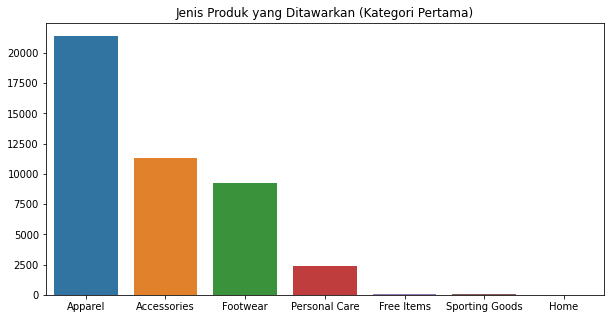

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=masterCategory.index, y=masterCategory.values)
plt.title("Jenis Produk yang Ditawarkan (Kategori Pertama)")

Jenis produk yang ditawarkan (secara kategori pertama) terbanyak adalah apparel, kemudian accessories dan footwear

<h3> Jenis Produk yang Ditawarkan (Kategori Turunan Kedua) </h3>

In [ ]:
subCategory = product['subCategory'].value_counts().head(10)

Text(0.5, 1.0, 'Jenis Produk yang Ditawarkan (Kategori Turunan Kedua)')

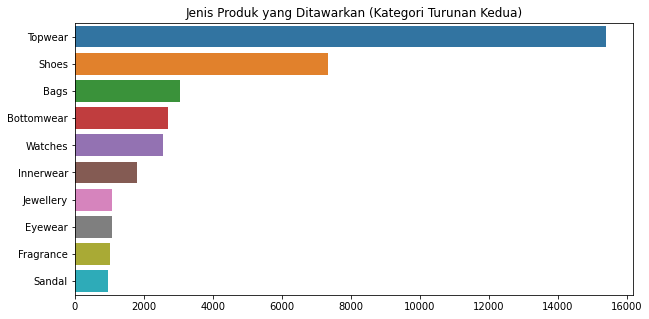

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=subCategory.values, y=subCategory.index)
plt.title("Jenis Produk yang Ditawarkan (Kategori Turunan Kedua)")

Jenis produk yang ditawarkan (secara kategori turunan kedua) terbanyak adalah topwear, kemudian shoes dan bags

<h3> Jenis Produk yang Ditawarkan (Kategori Turunan Ketiga) </h3>

In [ ]:
articleType = product['articleType'].value_counts().head(10)

Text(0.5, 1.0, 'Jenis Produk yang Ditawarkan (Kategori Turunan Ketiga)')

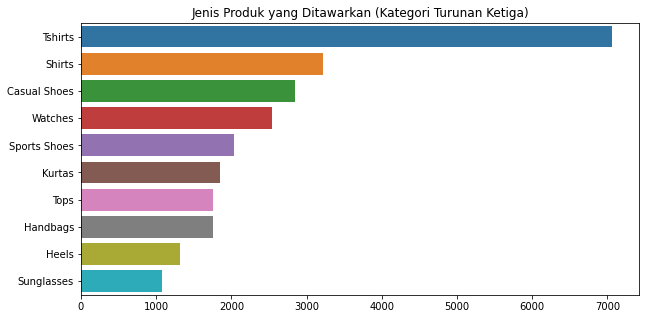

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=articleType.values, y=articleType.index)
plt.title("Jenis Produk yang Ditawarkan (Kategori Turunan Ketiga)")

jenis produk yang ditawarkan (secara kategori turunan ketiga) terbanyak adalah tshirts, kemudian shirts dan casual shoes

<h3> Jenis Pemakaian Produk yang Ditawarkan </h3>

In [ ]:
usage = product['usage'].value_counts()

Text(0.5, 1.0, 'Jenis Pemakaian Produk yang Ditawarkan')

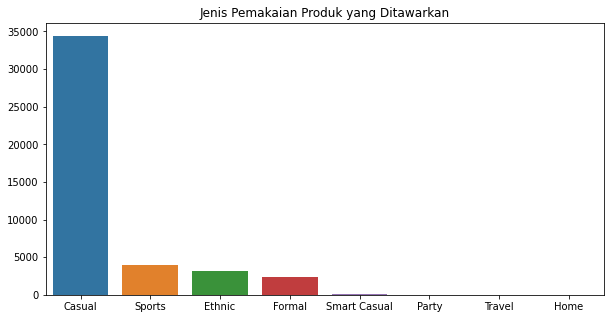

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=usage.index, y=usage.values)
plt.title("Jenis Pemakaian Produk yang Ditawarkan")

Jenis pemakaian produk yang ditawarkan terbanyak adalah casual, sports dan ethnic

<h2> Dataset click_stream </h2>

<h3> Traffic sources </h3>

In [ ]:
ts = click_stream['traffic_source'].value_counts()

Text(0.5, 1.0, 'Sumber Trafik Customer')

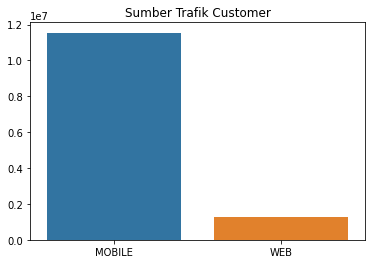

In [ ]:
sns.barplot(x=ts.index, y=ts.values)
plt.title("Sumber Trafik Customer")

terlihat bahwa sumber traffic customer terbesar adalah dari mobile (smart phone) kemudian dari web

<h1> Week 2: Feature Engineering </h1>





untuk feature engineering ini, kami melakukan beberapa save terhadap tahapan-tahapan dari feature engineering ini dikarenakan RAM yang disediakan oleh Google Colab free tidak mencukupi. <br>
Untuk hasil final dataset, kami menyimpannya secara pd.to_csv kemudian tinggal mengaksesnya melalui Google Drive. <br>
Oleh karena itu, untuk week 2 ini kebanyakan terdapat coding yang kami jadikan comment karena tidak perlu di-run lagi (namun masih tetap diperlukan bila terdapat kebutuhan ke depannya)

<h2> Customer dataset </h2>

In [ ]:
'''customer2 = pd.read_csv("/content/drive/MyDrive/Datasets/customer2.csv",
                        parse_dates=['birthdate','first_join_date'])
                        '''

'customer2 = pd.read_csv("/content/drive/MyDrive/Datasets/customer2.csv",\n                        parse_dates=[\'birthdate\',\'first_join_date\'])\n                        '

In [ ]:
#customer3 = customer2.copy()
#customer3.head()

<h3> Adding age </h3>

In [ ]:
#birthdate_year = pd.to_datetime(customer3['birthdate'], format='%Y-%m-%d').dt.year
#year = customer3['age'] = date.today().year - birthdate_year
#year

In [ ]:
#customer3.head()

<h3> Adding age_from_first_join_date </h3>

Kolom age_from_first_join_date adalah rentang waktu pelanggan pertama kali mendaftar di Fashion Campus sampai sekarang (dalam tahun)

In [ ]:
'''age_from_first_join_date = pd.to_datetime(customer2['first_join_date'], 
                                          format='%Y-%m-%d').dt.year
customer3['age_from_first_join_date'] = date.today().year - age_from_first_join_date
'''

"age_from_first_join_date = pd.to_datetime(customer2['first_join_date'], \n                                          format='%Y-%m-%d').dt.year\ncustomer3['age_from_first_join_date'] = date.today().year - age_from_first_join_date\n"

In [ ]:
#date.today().month

In [ ]:
#customer3.loc[0, 'first_join_date'].year

In [ ]:
#customer3['first_join_date'].min()

In [ ]:
#customer3['age_from_first_join_date_inMonth'] = pd.NA

In [ ]:
'''for i in range(0, len(customer3['first_join_date'])):
  if customer3.loc[i, 'first_join_date'].year == 2022:
    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3.loc[i, 'first_join_date'].month
  elif customer3.loc[i, 'first_join_date'].year == 2021:
    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3.loc[i, 'first_join_date'].month + 12
  elif customer3.loc[i, 'first_join_date'].year == 2020:
    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3.loc[i, 'first_join_date'].month + 24
  elif customer3.loc[i, 'first_join_date'].year == 2019:
    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3.loc[i, 'first_join_date'].month + 36
  elif customer3.loc[i, 'first_join_date'].year == 2018:
    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3.loc[i, 'first_join_date'].month + 48
  elif customer3.loc[i, 'first_join_date'].year == 2017:
    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3.loc[i, 'first_join_date'].month + 60
  elif customer3.loc[i, 'first_join_date'].year == 2016:
    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3.loc[i, 'first_join_date'].month + 72
    '''

"for i in range(0, len(customer3['first_join_date'])):\n  if customer3.loc[i, 'first_join_date'].year == 2022:\n    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3.loc[i, 'first_join_date'].month\n  elif customer3.loc[i, 'first_join_date'].year == 2021:\n    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3.loc[i, 'first_join_date'].month + 12\n  elif customer3.loc[i, 'first_join_date'].year == 2020:\n    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3.loc[i, 'first_join_date'].month + 24\n  elif customer3.loc[i, 'first_join_date'].year == 2019:\n    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3.loc[i, 'first_join_date'].month + 36\n  elif customer3.loc[i, 'first_join_date'].year == 2018:\n    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3.loc[i, 'first_join_date'].month + 48\n  elif customer3.loc[i, 'first_join_date'].year == 2017:\n    customer3.loc[i, 'age_from_first_join_date_inMonth'] = customer3

In [ ]:
#customer3.head()

<h3> Take customers who have bought at least once </h3>

In [ ]:
#customer_id_transactions2 = transactions2['customer_id'].unique().tolist()

In [ ]:
#type(customer_id_transactions2)

In [ ]:
#customer_id_transactions2_series = pd.Series(customer_id_transactions2).rename('customer_id_transactions2_series')

In [ ]:
#customer_id_transactions2_series

In [ ]:
'''customer3 = pd.merge(customer2, customer_id_transactions2_series, how='inner', 
            right_on='customer_id_transactions2_series', left_on='customer_id')
'''

"customer3 = pd.merge(customer2, customer_id_transactions2_series, how='inner', \n            right_on='customer_id_transactions2_series', left_on='customer_id')\n"

In [ ]:
#customer3.drop('customer_id_transactions2_series', axis=1, inplace=True)

In [ ]:
#customer3.shape

<h2> Transactions dataset</h2>

In [ ]:
#transactions2 = transactions.copy()

In [ ]:
#transactions2['index'] = transactions2.index

In [ ]:
#transactions2['product_metadata'] = transactions2['product_metadata'].str.replace('[', '')
#transactions2['product_metadata'] = transactions2['product_metadata'].str.replace(']', '')

In [ ]:
#transactions2.head(1)

In [ ]:
# speeding up process
'''explode_index = []
non_explode_index = []

for i in range(0, len(transactions2)):
  if type(transactions2['product_metadata'].iloc[i]) == tuple:
    explode_index.append(i)
  else:
    non_explode_index.append(i)
'''

"explode_index = []\nnon_explode_index = []\n\nfor i in range(0, len(transactions2)):\n  if type(transactions2['product_metadata'].iloc[i]) == tuple:\n    explode_index.append(i)\n  else:\n    non_explode_index.append(i)\n"

In [ ]:
#non_explode_cols = transactions2.iloc[non_explode_index, :]

In [ ]:
#explode_cols = transactions2.iloc[explode_index, :]

In [ ]:
#explode_cols = explode_cols.explode('product_metadata')

In [ ]:
#transactions3 = pd.concat([explode_cols, non_explode_cols]).sort_index()

In [ ]:
#transactions3.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

In [ ]:
#transactions3.columns

In [ ]:
#transactions3.shape

In [ ]:
#transactions3[['product_id', 'quantity', 'item_price']] = transactions3['product_metadata'].apply(pd.Series)

In [ ]:
#transactions2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
#transactions2.head()

In [ ]:
#transactions2.columns

In [ ]:
#type(transactions2['created_at'][0])

In [ ]:
'''x = []
for i in range(0, len(transactions2)):
  x.append(str(transactions2['shipment_location_lat'][i]) + ',' + str(transactions2['shipment_location_long'][i]))
'''

"x = []\nfor i in range(0, len(transactions2)):\n  x.append(str(transactions2['shipment_location_lat'][i]) + ',' + str(transactions2['shipment_location_long'][i]))\n"

In [ ]:
#len(x)

In [ ]:
#len(set(x))

In [ ]:
#geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
'''Latitude = "-8.227893"
Longitude = "111.969107"
 
location = geolocator.reverse(Latitude+","+Longitude)
 
# Display
print(location)
'''

'Latitude = "-8.227893"\nLongitude = "111.969107"\n \nlocation = geolocator.reverse(Latitude+","+Longitude)\n \n# Display\nprint(location)\n'

In [ ]:
#address = location.raw['address']
#print(address)

In [ ]:
#state = address.get('state', '')
#print('State : ',state)

In [ ]:
#transactions2_loc = transactions2[['booking_id', 'shipment_location_lat', 'shipment_location_long']]

In [ ]:
#transactions2_loc[['shipment_location_lat', 'shipment_location_long']] = \
#transactions2_loc[['shipment_location_lat', 'shipment_location_long']].astype('str')

In [ ]:
#transactions2_loc.head()

In [ ]:
'''temp = []

for i in range(0, len(transactions2_loc)):
  Latitude = transactions2_loc['shipment_location_lat'].iloc[i]
  Longitude = transactions2_loc['shipment_location_long'].iloc[i]
 
  location = geolocator.reverse(Latitude+","+Longitude)

  address = location.raw['address']

  state = address.get('state', '')
  temp.append(state)
'''

'temp = []\n\nfor i in range(0, len(transactions2_loc)):\n  Latitude = transactions2_loc[\'shipment_location_lat\'].iloc[i]\n  Longitude = transactions2_loc[\'shipment_location_long\'].iloc[i]\n \n  location = geolocator.reverse(Latitude+","+Longitude)\n\n  address = location.raw[\'address\']\n\n  state = address.get(\'state\', \'\')\n  temp.append(state)\n'

In [ ]:
#pd.Series(temp)

In [ ]:
'''transactions3 = pd.merge(transactions2, customer2[['home_location_lat', 
                                                   'home_location_long', 
                                                   'home_location']], 
                how='left', left_on=['shipment_location_lat', 
                                     'shipment_location_long'],
                right_on=['home_location_lat', 'home_location_long'])
'''

"transactions3 = pd.merge(transactions2, customer2[['home_location_lat', \n                                                   'home_location_long', \n                                                   'home_location']], \n                how='left', left_on=['shipment_location_lat', \n                                     'shipment_location_long'],\n                right_on=['home_location_lat', 'home_location_long'])\n"

In [ ]:
#transactions3['home_location'].isnull().sum()

In [ ]:
#transactions2[transactions2['customer_id']==4774]

<h2> Product dataset </h2>

In [ ]:
#product2 = product.copy()

In [ ]:
#product2.head()

<h3> Adding age product </h3>

In [ ]:
#product_add_age = product2['age'] = date.today().year - product2['year']
#product_add_age

<h2> click_stream dataset </h2>

In [ ]:
#click_stream.head()

In [ ]:
#click_stream2 = click_stream.copy()
#click_stream2.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#click_stream2['event_metadata'].shape

In [ ]:
'''x = []

for i in range(0, len(click_stream2['event_metadata'])):
  if type(click_stream2['event_metadata'][i]) != tuple:
    x.append(list(click_stream2['event_metadata'][i].keys()))
'''

"x = []\n\nfor i in range(0, len(click_stream2['event_metadata'])):\n  if type(click_stream2['event_metadata'][i]) != tuple:\n    x.append(list(click_stream2['event_metadata'][i].keys()))\n"

In [ ]:
#np.unique(x)

In [ ]:
# output
'''array([list(['payment_status']),
       list(['product_id', 'quantity', 'item_price']),
       list(['promo_code', 'promo_amount']), list(['search_keywords'])],
      dtype=object)
'''

"array([list(['payment_status']),\n       list(['product_id', 'quantity', 'item_price']),\n       list(['promo_code', 'promo_amount']), list(['search_keywords'])],\n      dtype=object)\n"

In [ ]:
'''multiple_dict = []

for i in range(0, len(click_stream2['event_metadata'])):
  if type(click_stream2['event_metadata'][i]) == tuple:
    multiple_dict.append(i)
'''

"multiple_dict = []\n\nfor i in range(0, len(click_stream2['event_metadata'])):\n  if type(click_stream2['event_metadata'][i]) == tuple:\n    multiple_dict.append(i)\n"

In [ ]:
#click_stream2.iloc[multiple_dict, -1].unique()

In [ ]:
# output
# array([()], dtype=object)

In [ ]:
'''payment_status_index = []
product_id_quantity_item_price_index = []
promo_code_promo_amount_index = []
search_keywords_index = []

for i in range(0, len(click_stream2['event_metadata'])):
  if type(click_stream2['event_metadata'][i]) == tuple:
    pass
  elif list(click_stream2['event_metadata'][i].keys()) == ['payment_status']:
    payment_status_index.append(i)
  elif list(click_stream2['event_metadata'][i].keys()) == ['product_id', 'quantity', 'item_price']:
    product_id_quantity_item_price_index.append(i)
  elif list(click_stream2['event_metadata'][i].keys()) == ['promo_code', 'promo_amount']:
    promo_code_promo_amount_index.append(i)
  elif list(click_stream2['event_metadata'][i].keys()) == ['search_keywords']:
    search_keywords_index.append(i)
'''

"payment_status_index = []\nproduct_id_quantity_item_price_index = []\npromo_code_promo_amount_index = []\nsearch_keywords_index = []\n\nfor i in range(0, len(click_stream2['event_metadata'])):\n  if type(click_stream2['event_metadata'][i]) == tuple:\n    pass\n  elif list(click_stream2['event_metadata'][i].keys()) == ['payment_status']:\n    payment_status_index.append(i)\n  elif list(click_stream2['event_metadata'][i].keys()) == ['product_id', 'quantity', 'item_price']:\n    product_id_quantity_item_price_index.append(i)\n  elif list(click_stream2['event_metadata'][i].keys()) == ['promo_code', 'promo_amount']:\n    promo_code_promo_amount_index.append(i)\n  elif list(click_stream2['event_metadata'][i].keys()) == ['search_keywords']:\n    search_keywords_index.append(i)\n"

In [ ]:
#click_stream2.head()

<h3> payment_status </h3>

In [ ]:
#payment_status_df = click_stream2.iloc[payment_status_index, :]

In [ ]:
#payment_status_df.head()

In [ ]:
#payment_status_df['payment_status'] = payment_status_df['event_metadata'].apply(pd.Series)

In [ ]:
#payment_status_df.head()

In [ ]:
#payment_status_df_1 = payment_status_df[['event_id', 'payment_status']]

In [ ]:
#payment_status_df_1.head()

<h3> product_id_quantity_item_price </h3>

In [ ]:
#product_id_quantity_item_price_df = click_stream2.iloc[product_id_quantity_item_price_index, :]

In [ ]:
#product_id_quantity_item_price_df.head()

In [ ]:
#product_id_quantity_item_price_df_1 = product_id_quantity_item_price_df[['event_id', 'event_metadata']]

In [ ]:
#product_id_quantity_item_price_df_1.head()

In [ ]:
#product_id_quantity_item_price_df_1[['product_id', 'quantity', 'item_price']] = product_id_quantity_item_price_df_1['event_metadata'].apply(pd.Series)

In [ ]:
#product_id_quantity_item_price_df_1.tail()

In [ ]:
#product_id_quantity_item_price_df_1.shape

In [ ]:
#product_id_quantity_item_price_df_1.to_csv('product_id_quantity_item_price_df_1.csv')

<h3> promo_code_promo_amount </h3>

In [ ]:
#promo_code_promo_amount_df = click_stream2.iloc[promo_code_promo_amount_index, :]

In [ ]:
#promo_code_promo_amount_df.head()

In [ ]:
#promo_code_promo_amount_df.shape

In [ ]:
#promo_code_promo_amount_df_1 = promo_code_promo_amount_df[['event_id', 'event_metadata']]

In [ ]:
#promo_code_promo_amount_df_1.head()

In [ ]:
#promo_code_promo_amount_df_1[['promo_code', 'promo_amount']] = promo_code_promo_amount_df_1['event_metadata'].apply(pd.Series)

In [ ]:
#promo_code_promo_amount_df_1.head()

In [ ]:
#promo_code_promo_amount_df_1.to_csv('promo_code_promo_amount_df_1.csv')

<h3> search_keywords </h3>

In [ ]:
#search_keywords_df = click_stream2.iloc[search_keywords_index, :]

In [ ]:
#search_keywords_df.head()

In [ ]:
#search_keywords_df.shape

In [ ]:
#search_keywords_df_1 = search_keywords_df[['event_id', 'event_metadata']]

In [ ]:
#search_keywords_df_1.head()

In [ ]:
#search_keywords_df_1.loc[:, 'search_keywords'] = search_keywords_df_1.loc[:, 'event_metadata'].apply(pd.Series)

In [ ]:
#search_keywords_df_1.head()

In [ ]:
#search_keywords_df_1

In [ ]:
#search_keywords_df_1.to_csv('search_keywords_df_1.csv')

<h3> Merging for click_stream dataset </h3>

In [ ]:
#payment_status_df_1 = pd.read_csv(r"E:\zz Achmad Zaky Foundation - modules\06_Final Project\click_stream_temp\payment_status_df_1.csv")
#product_id_quantity_item_price_df_1 = pd.read_csv(r"E:\zz Achmad Zaky Foundation - modules\06_Final Project\click_stream_temp\product_id_quantity_item_price_df_1.csv")
#promo_code_promo_amount_df_1 = pd.read_csv(r"E:\zz Achmad Zaky Foundation - modules\06_Final Project\click_stream_temp\promo_code_promo_amount_df_1.csv")
#search_keywords_df_1 = pd.read_csv(r"E:\zz Achmad Zaky Foundation - modules\06_Final Project\click_stream_temp\search_keywords_df_1.csv")

In [ ]:
#payment_status_df_1.drop('Unnamed: 0', axis=1, inplace=True)
#product_id_quantity_item_price_df_1.drop(['Unnamed: 0', 'event_metadata'], axis=1, inplace=True)
#promo_code_promo_amount_df_1.drop(['Unnamed: 0', 'event_metadata'], axis=1, inplace=True)
#search_keywords_df_1.drop(['Unnamed: 0', 'event_metadata'], axis=1, inplace=True)

In [ ]:
#search_keywords_df_1.head()

In [ ]:
#click_stream2_merge_1 = click_stream2.merge(payment_status_df_1, how='left', on='event_id')

In [ ]:
#click_stream2_merge_2 = click_stream2_merge_1.merge(product_id_quantity_item_price_df_1, how='left', on='event_id')

In [ ]:
#click_stream2_merge_3 = click_stream2_merge_2.merge(promo_code_promo_amount_df_1, how='left', on='event_id')

In [ ]:
#click_stream3 = click_stream2_merge_3.merge(search_keywords_df_1, how='left', on='event_id')

In [ ]:
#click_stream3.tail()

In [ ]:
#click_stream3.to_csv('click_stream3.csv')

In [ ]:
#click_stream2 = click_stream.copy()

In [ ]:
#click_stream2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
#click_stream2.head()

<h3> Making churn labelling </h3>

In [ ]:
#transactions3['created_at'].min()

In [ ]:
#transactions3['created_at'].max()

In [ ]:
#type(transactions3['created_at'][0].year)

In [ ]:
'''transactions4 = transactions3[['customer_id', 'created_at', 'payment_status']] \
                  .sort_values(by=['customer_id'], ignore_index=True)
'''

"transactions4 = transactions3[['customer_id', 'created_at', 'payment_status']]                   .sort_values(by=['customer_id'], ignore_index=True)\n"

In [ ]:
# taking for payment_status == Success only
#transactions4 = transactions4[transactions4['payment_status']=='Success'].reset_index()
#transactions4.drop('index', axis=1, inplace=True)

In [ ]:
#transactions4.head()

In [ ]:
# customer_id yang pernah melakukan transaksi
#customer_id_unique = transactions4['customer_id'].unique().tolist()

In [ ]:
'''churn_windowing = pd.DataFrame(columns=['customer_id', 'Jun 16', 'Jul 16', 'Aug 16', 'Sep 16', 'Oct 16', 'Nov 16', 'Dec 16',
                                        'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17', 'Sep 17', 'Oct 17', 'Nov 17', 'Dec 17',
                                        'Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18', 'Nov 18', 'Dec 18',
                                        'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19',
                                        'Jan 20', 'Feb 20', 'Mar 20', 'Apr 20', 'May 20', 'Jun 20', 'Jul 20', 'Aug 20', 'Sep 20', 'Oct 20', 'Nov 20', 'Dec 20',
                                        'Jan 21', 'Feb 21', 'Mar 21', 'Apr 21', 'May 21', 'Jun 21', 'Jul 21', 'Aug 21', 'Sep 21', 'Oct 21', 'Nov 21', 'Dec 21',
                                        'Jan 22', 'Feb 22', 'Mar 22', 'Apr 22', 'May 22', 'Jun 22', 'Jul 22'])
'''

"churn_windowing = pd.DataFrame(columns=['customer_id', 'Jun 16', 'Jul 16', 'Aug 16', 'Sep 16', 'Oct 16', 'Nov 16', 'Dec 16',\n                                        'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17', 'Sep 17', 'Oct 17', 'Nov 17', 'Dec 17',\n                                        'Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18', 'Nov 18', 'Dec 18',\n                                        'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19',\n                                        'Jan 20', 'Feb 20', 'Mar 20', 'Apr 20', 'May 20', 'Jun 20', 'Jul 20', 'Aug 20', 'Sep 20', 'Oct 20', 'Nov 20', 'Dec 20',\n                                        'Jan 21', 'Feb 21', 'Mar 21', 'Apr 21', 'May 21', 'Jun 21', 'Jul 21', 'Aug 21', 'Sep 21', 'Oct 21', 'Nov 21', 'Dec 21',\n                                        'Jan 22', 'Feb 22', 'Mar 22'

In [ ]:
#churn_windowing['customer_id'] = customer_id_unique

In [ ]:
'''churn_windowing[['Jun 16', 'Jul 16', 'Aug 16', 'Sep 16', 'Oct 16', 'Nov 16', 'Dec 16',
                 'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17', 'Sep 17', 'Oct 17', 'Nov 17', 'Dec 17',
                 'Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18', 'Nov 18', 'Dec 18',
                 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19',
                 'Jan 20', 'Feb 20', 'Mar 20', 'Apr 20', 'May 20', 'Jun 20', 'Jul 20', 'Aug 20', 'Sep 20', 'Oct 20', 'Nov 20', 'Dec 20',
                 'Jan 21', 'Feb 21', 'Mar 21', 'Apr 21', 'May 21', 'Jun 21', 'Jul 21', 'Aug 21', 'Sep 21', 'Oct 21', 'Nov 21', 'Dec 21',
                 'Jan 22', 'Feb 22', 'Mar 22', 'Apr 22', 'May 22', 'Jun 22', 'Jul 22']] = pd.NA
'''

"churn_windowing[['Jun 16', 'Jul 16', 'Aug 16', 'Sep 16', 'Oct 16', 'Nov 16', 'Dec 16',\n                 'Jan 17', 'Feb 17', 'Mar 17', 'Apr 17', 'May 17', 'Jun 17', 'Jul 17', 'Aug 17', 'Sep 17', 'Oct 17', 'Nov 17', 'Dec 17',\n                 'Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18', 'Nov 18', 'Dec 18',\n                 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19', 'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19',\n                 'Jan 20', 'Feb 20', 'Mar 20', 'Apr 20', 'May 20', 'Jun 20', 'Jul 20', 'Aug 20', 'Sep 20', 'Oct 20', 'Nov 20', 'Dec 20',\n                 'Jan 21', 'Feb 21', 'Mar 21', 'Apr 21', 'May 21', 'Jun 21', 'Jul 21', 'Aug 21', 'Sep 21', 'Oct 21', 'Nov 21', 'Dec 21',\n                 'Jan 22', 'Feb 22', 'Mar 22', 'Apr 22', 'May 22', 'Jun 22', 'Jul 22']] = pd.NA\n"

In [ ]:
#churn_windowing.head()

In [ ]:
#type(churn_windowing.loc[0, 'Jun 16'])

In [ ]:
#churn_windowing.loc[churn_windowing["customer_id"]==3, "Jun 16"] = 1

In [ ]:
# churned = 1
# not churned = 0

'''for i in range(0, len(transactions4)):
  j = transactions4['customer_id'][i]
  if transactions4['created_at'][i].year == 2016:
    if transactions4['created_at'][i].month == 6:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jun 16"] = 0
    elif transactions4['created_at'][i].month == 7:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jul 16"] = 0
    elif transactions4['created_at'][i].month == 8:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Aug 16"] = 0
    elif transactions4['created_at'][i].month == 9:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Sep 16"] = 0
    elif transactions4['created_at'][i].month == 10:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Oct 16"] = 0
    elif transactions4['created_at'][i].month == 11:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Nov 16"] = 0
    elif transactions4['created_at'][i].month == 12:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Dec 16"] = 0

  elif transactions4['created_at'][i].year == 2017:
    if transactions4['created_at'][i].month == 1:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jan 17"] = 0
    elif transactions4['created_at'][i].month == 2:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Feb 17"] = 0
    elif transactions4['created_at'][i].month == 3:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Mar 17"] = 0
    elif transactions4['created_at'][i].month == 4:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Apr 17"] = 0
    elif transactions4['created_at'][i].month == 5:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "May 17"] = 0
    elif transactions4['created_at'][i].month == 6:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jun 17"] = 0
    elif transactions4['created_at'][i].month == 7:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jul 17"] = 0
    elif transactions4['created_at'][i].month == 8:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Aug 17"] = 0
    elif transactions4['created_at'][i].month == 9:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Sep 17"] = 0
    elif transactions4['created_at'][i].month == 10:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Oct 17"] = 0
    elif transactions4['created_at'][i].month == 11:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Nov 17"] = 0
    elif transactions4['created_at'][i].month == 12:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Dec 17"] = 0
  
  elif transactions4['created_at'][i].year == 2018:
    if transactions4['created_at'][i].month == 1:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jan 18"] = 0
    elif transactions4['created_at'][i].month == 2:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Feb 18"] = 0
    elif transactions4['created_at'][i].month == 3:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Mar 18"] = 0
    elif transactions4['created_at'][i].month == 4:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Apr 18"] = 0
    elif transactions4['created_at'][i].month == 5:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "May 18"] = 0
    elif transactions4['created_at'][i].month == 6:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jun 18"] = 0
    elif transactions4['created_at'][i].month == 7:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jul 18"] = 0
    elif transactions4['created_at'][i].month == 8:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Aug 18"] = 0
    elif transactions4['created_at'][i].month == 9:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Sep 18"] = 0
    elif transactions4['created_at'][i].month == 10:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Oct 18"] = 0
    elif transactions4['created_at'][i].month == 11:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Nov 18"] = 0
    elif transactions4['created_at'][i].month == 12:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Dec 18"] = 0
  
  elif transactions4['created_at'][i].year == 2019:
    if transactions4['created_at'][i].month == 1:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jan 19"] = 0
    elif transactions4['created_at'][i].month == 2:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Feb 19"] = 0
    elif transactions4['created_at'][i].month == 3:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Mar 19"] = 0
    elif transactions4['created_at'][i].month == 4:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Apr 19"] = 0
    elif transactions4['created_at'][i].month == 5:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "May 19"] = 0
    elif transactions4['created_at'][i].month == 6:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jun 19"] = 0
    elif transactions4['created_at'][i].month == 7:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jul 19"] = 0
    elif transactions4['created_at'][i].month == 8:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Aug 19"] = 0
    elif transactions4['created_at'][i].month == 9:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Sep 19"] = 0
    elif transactions4['created_at'][i].month == 10:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Oct 19"] = 0
    elif transactions4['created_at'][i].month == 11:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Nov 19"] = 0
    elif transactions4['created_at'][i].month == 12:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Dec 19"] = 0

  elif transactions4['created_at'][i].year == 2020:
    if transactions4['created_at'][i].month == 1:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jan 20"] = 0
    elif transactions4['created_at'][i].month == 2:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Feb 20"] = 0
    elif transactions4['created_at'][i].month == 3:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Mar 20"] = 0
    elif transactions4['created_at'][i].month == 4:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Apr 20"] = 0
    elif transactions4['created_at'][i].month == 5:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "May 20"] = 0
    elif transactions4['created_at'][i].month == 6:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jun 20"] = 0
    elif transactions4['created_at'][i].month == 7:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jul 20"] = 0
    elif transactions4['created_at'][i].month == 8:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Aug 20"] = 0
    elif transactions4['created_at'][i].month == 9:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Sep 20"] = 0
    elif transactions4['created_at'][i].month == 10:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Oct 20"] = 0
    elif transactions4['created_at'][i].month == 11:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Nov 20"] = 0
    elif transactions4['created_at'][i].month == 12:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Dec 20"] = 0

  elif transactions4['created_at'][i].year == 2021:
    if transactions4['created_at'][i].month == 1:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jan 21"] = 0
    elif transactions4['created_at'][i].month == 2:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Feb 21"] = 0
    elif transactions4['created_at'][i].month == 3:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Mar 21"] = 0
    elif transactions4['created_at'][i].month == 4:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Apr 21"] = 0
    elif transactions4['created_at'][i].month == 5:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "May 21"] = 0
    elif transactions4['created_at'][i].month == 6:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jun 21"] = 0
    elif transactions4['created_at'][i].month == 7:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jul 21"] = 0
    elif transactions4['created_at'][i].month == 8:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Aug 21"] = 0
    elif transactions4['created_at'][i].month == 9:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Sep 21"] = 0
    elif transactions4['created_at'][i].month == 10:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Oct 21"] = 0
    elif transactions4['created_at'][i].month == 11:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Nov 21"] = 0
    elif transactions4['created_at'][i].month == 12:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Dec 21"] = 0

  elif transactions4['created_at'][i].year == 2022:
    if transactions4['created_at'][i].month == 1:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jan 22"] = 0
    elif transactions4['created_at'][i].month == 2:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Feb 22"] = 0
    elif transactions4['created_at'][i].month == 3:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Mar 22"] = 0
    elif transactions4['created_at'][i].month == 4:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Apr 22"] = 0
    elif transactions4['created_at'][i].month == 5:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "May 22"] = 0
    elif transactions4['created_at'][i].month == 6:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jun 22"] = 0
    elif transactions4['created_at'][i].month == 7:
      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jul 22"] = 0
'''

'for i in range(0, len(transactions4)):\n  j = transactions4[\'customer_id\'][i]\n  if transactions4[\'created_at\'][i].year == 2016:\n    if transactions4[\'created_at\'][i].month == 6:\n      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jun 16"] = 0\n    elif transactions4[\'created_at\'][i].month == 7:\n      churn_windowing.loc[churn_windowing["customer_id"]==j, "Jul 16"] = 0\n    elif transactions4[\'created_at\'][i].month == 8:\n      churn_windowing.loc[churn_windowing["customer_id"]==j, "Aug 16"] = 0\n    elif transactions4[\'created_at\'][i].month == 9:\n      churn_windowing.loc[churn_windowing["customer_id"]==j, "Sep 16"] = 0\n    elif transactions4[\'created_at\'][i].month == 10:\n      churn_windowing.loc[churn_windowing["customer_id"]==j, "Oct 16"] = 0\n    elif transactions4[\'created_at\'][i].month == 11:\n      churn_windowing.loc[churn_windowing["customer_id"]==j, "Nov 16"] = 0\n    elif transactions4[\'created_at\'][i].month == 12:\n      churn_windowing.l

In [ ]:
#churn_windowing2 = pd.read_csv("/content/drive/MyDrive/Datasets/churn_windowing_temp/churn_windowing.csv")

In [ ]:
#churn_windowing3 = pd.read_csv("/content/drive/MyDrive/Datasets/churn_windowing3.csv")

In [ ]:
#churn_windowing.tail()

In [ ]:
#type(churn_windowing.loc[0, 'Aug 18'])

In [ ]:
#type(pd.NA)

In [ ]:
'''for i in range(0, len(churn_windowing)):
  for j in range(0, len(churn_windowing.columns)):
    if churn_windowing.iloc[i, j] != 0.0:
      churn_windowing.iloc[i, j] = 2
    elif churn_windowing.iloc[i, j] == 0.0:
      break
'''

'for i in range(0, len(churn_windowing)):\n  for j in range(0, len(churn_windowing.columns)):\n    if churn_windowing.iloc[i, j] != 0.0:\n      churn_windowing.iloc[i, j] = 2\n    elif churn_windowing.iloc[i, j] == 0.0:\n      break\n'

In [ ]:
'''for i in range(0, len(churn_windowing)):
  for j in range(0, len(churn_windowing.columns)):
    if churn_windowing.iloc[i, j] != 0.0 and churn_windowing.iloc[i, j] != 2.0:
      churn_windowing.iloc[i, j] = 1
'''

'for i in range(0, len(churn_windowing)):\n  for j in range(0, len(churn_windowing.columns)):\n    if churn_windowing.iloc[i, j] != 0.0 and churn_windowing.iloc[i, j] != 2.0:\n      churn_windowing.iloc[i, j] = 1\n'

In [ ]:
#churn_windowing4 = churn_windowing.copy()

In [ ]:
#churn_windowing4 = churn_windowing4.astype(int)

In [ ]:
#churn_windowing4.drop('customer_id', axis=1, inplace=True)

In [ ]:
#churn_windowing4.head()

In [ ]:
#customer_id_series = churn_windowing2['customer_id']

In [ ]:
#customer_id_series

In [ ]:
#churn_windowing5 = pd.concat([customer_id_series, churn_windowing4], axis=1)

In [ ]:
#churn_windowing5.tail()

In [ ]:
'''for i in range(0, len(churn_windowing)):
  if churn_windowing.loc[i, 'Jul 22'] == 2:
    churn_windowing.drop(i, inplace=True)
'''

"for i in range(0, len(churn_windowing)):\n  if churn_windowing.loc[i, 'Jul 22'] == 2:\n    churn_windowing.drop(i, inplace=True)\n"

In [ ]:
#churn_windowing = pd.read_csv("/content/drive/MyDrive/Datasets/churn_windowing5.csv")

In [ ]:
#churn_windowing.head()

1.   1 -> churn
2.   2 -> 
3.   0 ->



In [ ]:
#churn_windowing.shape

terlihat bahwa dari 100000 customer yang terdaftar, terdapat 50242 customer yang melakukan pembelian ke Fashion Campus minimal satu kali dalam rentang waktu Juni 2016 - Juli 2022

In [ ]:
#churn_windowing['Jul 22'].value_counts()

dari 50242 customer tadi, terlihat bahwa sekitar 40268 customer (81% dari keseluruhan) melakukan churned/tidak kembali lagi untuk membeli

<h2>New datasets after feature engineering</h2>

<h3> Customer dataset </h3>

In [ ]:
#customer2 = pd.read_csv("/content/drive/MyDrive/Datasets/customer2.csv")
#customer3 = customer2.copy()
#customer3.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#customer3.head()

In [ ]:
#customer3.shape

In [ ]:
#customer4 = pd.merge(churn_windowing['customer_id'], customer3, how='inner',
#            on='customer_id')

In [ ]:
#customer5 = customer4[['customer_id', 'gender', 'device_type', 'home_location',
#                       'age', 'age_from_first_join_date']]

In [ ]:
#customer5.head()

<h3> Transactions dataset </h3>

In [ ]:
'''transactions2 = pd.read_csv("/content/drive/MyDrive/Datasets/transactions3.csv",
                            parse_dates=['created_at', 'shipment_date_limit'])
transactions3 = transactions2.copy()
transactions3.drop(['Unnamed: 0', 'product_metadata'], axis=1, inplace=True)
'''

'transactions2 = pd.read_csv("/content/drive/MyDrive/Datasets/transactions3.csv",\n                            parse_dates=[\'created_at\', \'shipment_date_limit\'])\ntransactions3 = transactions2.copy()\ntransactions3.drop([\'Unnamed: 0\', \'product_metadata\'], axis=1, inplace=True)\n'

In [ ]:
#transactions3.head()

In [ ]:
#transactions4 = transactions3[transactions3['payment_status']=='Success']

In [ ]:
#customer_id_ever_bought = churn_windowing['customer_id']

In [ ]:
#id_session_ever_bought = pd.merge(customer_id_ever_bought, transactions3[['customer_id', 'session_id']],
#                                  how='inner', on='customer_id')

In [ ]:
#id_session_ever_bought

In [ ]:
'''transactions5 = transactions4.groupby(['customer_id']).agg(
    {'payment_method': pd.Series.mode,
     'promo_amount': 'mean',
     'promo_code': pd.Series.mode,
     'shipment_fee': 'mean',
     'total_amount': 'mean',
     'quantity': pd.Series.mean,
     'item_price': 'mean'})
'''

"transactions5 = transactions4.groupby(['customer_id']).agg(\n    {'payment_method': pd.Series.mode,\n     'promo_amount': 'mean',\n     'promo_code': pd.Series.mode,\n     'shipment_fee': 'mean',\n     'total_amount': 'mean',\n     'quantity': pd.Series.mean,\n     'item_price': 'mean'})\n"

In [ ]:
#transactions5.head()

<h3> Product dataset </h3>

In [ ]:
'''product2 = pd.read_csv("/content/drive/MyDrive/Mockup Datasets/product.csv", 
                      on_bad_lines='warn')
product3 = product2.copy()
'''

'product2 = pd.read_csv("/content/drive/MyDrive/Mockup Datasets/product.csv", \n                      on_bad_lines=\'warn\')\nproduct3 = product2.copy()\n'

In [ ]:
#product3.head()

<h3> click_stream dataset </h3>

In [ ]:
#click_stream2 = pd.read_csv("/content/drive/MyDrive/Datasets/click_stream3.csv")
#click_stream3 = click_stream2.copy()
#click_stream3.drop(['Unnamed: 0', 'event_metadata'], axis=1, inplace=True)

In [ ]:
#click_stream3.head()

In [ ]:
#click_stream4 = pd.merge(id_session_ever_bought, click_stream3, how='inner',
#         on='session_id')

In [ ]:
'''click_stream5 = click_stream4.groupby(['customer_id']).agg({'traffic_source': pd.Series.mode,
                                            'event_name': pd.Series.mode,
                                            'event_id': 'count'})
'''

"click_stream5 = click_stream4.groupby(['customer_id']).agg({'traffic_source': pd.Series.mode,\n                                            'event_name': pd.Series.mode,\n                                            'event_id': 'count'})\n"

<h3> Merging all feature engineering </h3>

In [ ]:
#df1 = pd.merge(customer5, transactions5, how='inner', on='customer_id')

In [ ]:
#df2 = pd.merge(df1, click_stream5, how='inner', on='customer_id')

In [ ]:
#churned = churn_windowing[['customer_id', 'Jul 22']]

In [ ]:
#df3 = pd.merge(df2, churned, how='inner', on='customer_id')

In [ ]:
#df3.head()

In [ ]:
#df3['Jul 22'].value_counts()

In [ ]:
#df3['promo_code'][17]

In [ ]:
#type(np.array([]))

In [ ]:
'''temp_array = []
temp_not_array = []

for i in range(0, len(df3)):
  if type(df3['payment_method'][i]) == type(np.array([])):
    temp_array.append(i)
  else:
    temp_not_array.append(i)
'''

"temp_array = []\ntemp_not_array = []\n\nfor i in range(0, len(df3)):\n  if type(df3['payment_method'][i]) == type(np.array([])):\n    temp_array.append(i)\n  else:\n    temp_not_array.append(i)\n"

In [ ]:
#payment_method_series = df3.iloc[temp_array, :]

In [ ]:
#payment_method_series_explode = payment_method_series.explode('payment_method')

In [ ]:
#payment_method_series_explode2 = payment_method_series_explode.groupby(['customer_id']).agg({'payment_method': 'last'})

In [ ]:
#payment_method_series_explode2['customer_id'] = payment_method_series_explode2.index

In [ ]:
#payment_method_series_explode2.head()

In [ ]:
#payment_method_series_not_array_series = df3.iloc[temp_not_array, :]

In [ ]:
#payment_method_series_not_array_series

In [ ]:
#payment_method_series_not_array_series2 = payment_method_series_not_array_series[['customer_id', 'payment_method']]

In [ ]:
#payment_method = pd.concat([payment_method_series_not_array_series2, payment_method_series_explode2])

In [ ]:
#df3.drop('payment_method', axis=1, inplace=True)

In [ ]:
#df4 = pd.merge(df3, payment_method, how='inner', on='customer_id')

In [ ]:
#df4.head()

In [ ]:
#df5 = df4.explode('promo_code')

In [ ]:
#promo_code = df5.groupby(['customer_id']).agg({'promo_code': 'last'})

In [ ]:
#df4.drop('promo_code', axis=1, inplace=True)

In [ ]:
#df5 = pd.merge(df4, promo_code, how='left', left_on='customer_id', right_on=promo_code.index)

In [ ]:
#df5.head()

In [ ]:
#df6 = df5.explode('event_name')

In [ ]:
#event_name = df6.groupby(['customer_id']).agg({'event_name': 'last'})

In [ ]:
#df5.drop('event_name', axis=1, inplace=True)

In [ ]:
#df6 = pd.merge(df5, event_name, how='left', left_on='customer_id', right_on=event_name.index)

In [ ]:
#df6.head()

In [ ]:
#df6 = pd.read_csv("/content/drive/MyDrive/Datasets/df_temp/df3.csv")

In [ ]:
#df7 = df6.explode('traffic_source')

In [ ]:
#traffic_source = df7.groupby(['customer_id']).agg({'traffic_source': 'last'})

In [ ]:
#df6.drop('traffic_source', axis=1, inplace=True)

In [ ]:
#df7 = pd.merge(df6, traffic_source, how='left', left_on='customer_id', right_on=traffic_source.index)

In [ ]:
#df7.rename(columns={'Jul 22': 'churned'}, inplace=True)

In [ ]:
#df7.rename(columns={'event_id': 'event_count'}, inplace=True)

In [ ]:
#df7.columns

In [ ]:
'''df7 = df7[['customer_id', 'gender', 'device_type', 'home_location', 'age',
           'age_from_first_join_date', 'promo_amount', 'shipment_fee', 
           'total_amount', 'quantity', 'item_price', 'event_count',
           'payment_method', 'promo_code', 'event_name', 'traffic_source',
           'churned']]
'''

"df7 = df7[['customer_id', 'gender', 'device_type', 'home_location', 'age',\n           'age_from_first_join_date', 'promo_amount', 'shipment_fee', \n           'total_amount', 'quantity', 'item_price', 'event_count',\n           'payment_method', 'promo_code', 'event_name', 'traffic_source',\n           'churned']]\n"

In [ ]:
#len(df7.columns)

In [ ]:
#y = df7['churned']

In [ ]:
#df8 = df7.drop('churned', axis=1)

In [ ]:
#df8

<h2> Final Dataset </h2>

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/df4.csv")

In [ ]:
df['quantity'] = np.floor(df['quantity'])

In [ ]:
df.head()

,customer_id,gender,device_type,home_location,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,payment_method,promo_code,event_name,traffic_source,churned
0,3,M,Android,Jakarta Raya,36,4,2570.652174,6811.594203,658950.478261,1.0,242216.420290,1021,Credit Card,WEEKENDSERU,ADD_TO_CART,MOBILE,1
1,8,F,Android,Sulawesi Utara,22,1,962.375000,6875.000000,594825.125000,2.0,252154.875000,221,Credit Card,WEEKENDSERU,HOMEPAGE,MOBILE,1
2,9,F,Android,Jakarta Raya,16,1,0.000000,5625.000000,514203.750000,1.0,308843.125000,94,Gopay,NaN,ADD_TO_CART,MOBILE,1
3,11,M,Android,Kalimantan Timur,29,0,9492.000000,15000.000000,197533.000000,1.0,192025.000000,14,OVO,XX2022,ADD_TO_CART,MOBILE,1
4,15,F,Android,Jawa Barat,39,3,1818.000000,10000.000000,716360.666667,1.0,233470.222222,109,LinkAja,BUYMORE,ADD_TO_CART,MOBILE,1


In [ ]:
df.columns

Index(['customer_id', 'gender', 'device_type', 'home_location', 'age',
       'age_from_first_join_date', 'promo_amount', 'shipment_fee',
       'total_amount', 'quantity', 'item_price', 'event_count',
       'payment_method', 'promo_code', 'event_name', 'traffic_source',
       'churned'],
      dtype='object')

In [ ]:
df2 = df.drop('churned', axis=1)
y = df['churned']

In [ ]:
#df2 = X_res
#y = y_res

<h3> Identify features using WOE and IV </h3>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
  
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [ ]:
final_iv, IV = data_vars(df2, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [ ]:
IV.sort_values('IV')

,VAR_NAME,IV
6,gender,0.000009
0,age,0.000009
2,customer_id,0.000096
3,device_type,0.000102
7,home_location,0.005690
13,shipment_fee,0.005825
8,item_price,0.007771
9,payment_method,0.009392
10,promo_amount,0.009434
15,traffic_source,0.046287


Rule of Thumb IV:
<ol>
  <li> < 0.02  = useless for prediction</li>
  <li> 0.02 to 0.1 = weak prediction</li>
  <li> 0.1 to 0.3  = medium prediction</li>
  <li> 0.3 to 0.5  = strong prediction</li>
  <li> > 0.5       = too good to be true prediction</li>
</ol> 

Berdasarkan hal di atas, karena hanya terdapat beberapa feature yang memiliki medium/strong prediction, maka kami memutuskan untuk menggunakan semua feature yang ada dan melakukan perbaikan pada parameter machine learning model dengan dilakukan cross validation + hyperparameter tuning untuk mendapatkan akurasi optimal.

<h1> Week 3: Feature Engineering + Baseline model </h1>

In [ ]:
df2 = df.copy()

In [ ]:
X = df2.drop(['customer_id', 'churned'], axis=1)
y = df2['churned']

In [ ]:
y.value_counts(normalize=True)

1    0.801477
0    0.198523
Name: churned, dtype: float64

karena target variable tidak seimbang (80% berbanding 20%), maka kita dapat melakukan oversampling menggunakan SMOTENC (SMOTE Nominal and Continuous)

In [ ]:
X.head()

,gender,device_type,home_location,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,payment_method,promo_code,event_name,traffic_source
0,M,Android,Jakarta Raya,36,4,2570.652174,6811.594203,658950.478261,1.0,242216.420290,1021,Credit Card,WEEKENDSERU,ADD_TO_CART,MOBILE
1,F,Android,Sulawesi Utara,22,1,962.375000,6875.000000,594825.125000,2.0,252154.875000,221,Credit Card,WEEKENDSERU,HOMEPAGE,MOBILE
2,F,Android,Jakarta Raya,16,1,0.000000,5625.000000,514203.750000,1.0,308843.125000,94,Gopay,NaN,ADD_TO_CART,MOBILE
3,M,Android,Kalimantan Timur,29,0,9492.000000,15000.000000,197533.000000,1.0,192025.000000,14,OVO,XX2022,ADD_TO_CART,MOBILE
4,F,Android,Jawa Barat,39,3,1818.000000,10000.000000,716360.666667,1.0,233470.222222,109,LinkAja,BUYMORE,ADD_TO_CART,MOBILE


In [ ]:
X.isnull().sum()

gender                          0
device_type                     0
home_location                   0
age                             0
age_from_first_join_date        0
promo_amount                    0
shipment_fee                    0
total_amount                    0
quantity                        0
item_price                      0
event_count                     0
payment_method                  0
promo_code                  11853
event_name                      0
traffic_source                  0
dtype: int64

<h2> SMOTE NC (Nominal and Countinuous) </h2>

In [ ]:
# fill na value
X['promo_code'] = X['promo_code'].fillna(method='ffill')

In [ ]:
# SMOTENC oversampling
sm = SMOTENC(random_state=0, sampling_strategy={0:40000}, 
             categorical_features=[0, 1, 2, 11, 12, 13, 14])
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
# target variable before oversampling
y.value_counts(normalize=True)

1    0.801477
0    0.198523
Name: churned, dtype: float64

In [ ]:
# target variable after oversampling
y_res.value_counts(normalize=True)

1    0.501663
0    0.498337
Name: churned, dtype: float64

terlihat bahwa target variable 'churned' sudah seimbang datanya

<h2> Baseline model </h2>

In [ ]:
# labelling numerical to categorical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X_res['gender'] = le.fit_transform(X_res['gender'])
X_res['device_type'] = le.fit_transform(X_res['device_type'])
X_res['home_location'] = le.fit_transform(X_res['home_location'])
X_res['payment_method'] = le.fit_transform(X_res['payment_method'])
X_res['promo_code'] = le.fit_transform(X_res['promo_code'])
X_res['event_name'] = le.fit_transform(X_res['event_name'])
X_res['traffic_source'] = le.fit_transform(X_res['traffic_source'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                    test_size=0.25, 
                                                    random_state=0)

<h3> Random Forest Classifier </h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[9726,  237],
       [ 409, 9695]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9963
           1       0.98      0.96      0.97     10104

    accuracy                           0.97     20067
   macro avg       0.97      0.97      0.97     20067
weighted avg       0.97      0.97      0.97     20067



[Text(58.5, 0.5, 'Actual data'), Text(0.5, 31.5, 'Predicted data')]

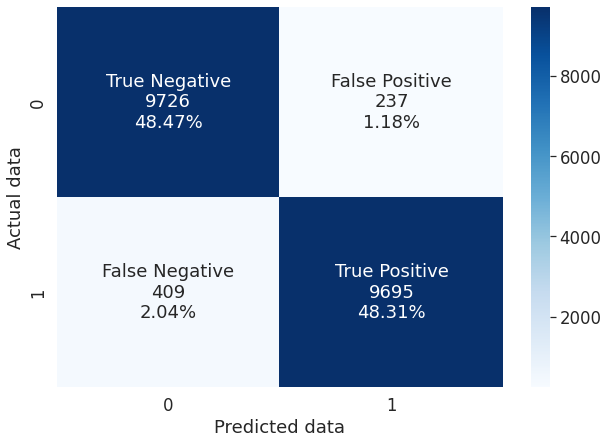

In [ ]:
plt.figure(figsize=(10, 7))

cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Negative', 'False Positive', 'False Negative',
               'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set(
    xlabel='Predicted data', ylabel='Actual data')

In [ ]:
print(f'AUC score: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')

AUC score: 0.9678664830657281
Recall score: 0.9595209817893904


Menurut kami, hal terpenting dari churn assessments adalah recall. <br>
Karena kita lebih memilih; salah dalam memilih churn daripada salah dalam memilih non churn.<br>
Bila salah memilih churn (berarti customer sebenarnya non churn), maka tidak masalah karena memang customer tersebut non churn.<br>
Bila salah memilih non churn (berarti customer sebenarnya churn), maka kita kehilangan customer tanpa kita sadari<br>
Walaupun di sisi lain, salah dalam memilih customer churn (berarti customer sebenarnya non churn), berarti perusahaan mengeluarkan sumber daya (misal biaya promosi) untuk customer non churn yang sebenarnya tidak perlu 

Maka, untuk baseline model ini, dengan Random Forest Classifier, terlihat bahwa nilai AUC score = 0.96 dan recall score = 0.95 <br>
maka, final dataset cenderung baik untuk dianalisis

<h1> Week 4: Doing another machine learning model + Cross Validation + Hyperparameter Tuning</h1>

<h2> Logistic Regression </h2>

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)

In [ ]:
#df.head()

In [ ]:
'''f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['item_price'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['shipment_fee'])
plt.show()
'''

In [ ]:
'''f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['shipment_fee'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['total_amount'])
plt.show()
'''

In [ ]:
'''plt.scatter(df['shipment_fee'], df['total_amount'])
plt.xlabel('shipment_fee')
plt.ylabel('total_amount')
plt.title('Scatter Plot shipment_fee vs total_amount')
plt.show()
...

In [ ]:
#x = df['shipment_fee'].values.reshape(-1,1)
#y = df['total_amount'].values.reshape(-1,1)

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
#log_reg = LogisticRegression()

In [ ]:
'''def inspection(dataframe):
  import pandas as pd
  import seaborn as sns
  print("Types of the variables we are working with:")
  print(dataframe.dtypes)
  
  print("Total Samples with missing values:")

  print(df.isnull().any(axis=1).sum())

  print("Total Missing Values per Variable")
  print(df.isnull().sum())
  print("Map of missing values")
  sns.heatmap(dataframe.isnull())
  '''

In [ ]:
#inspection(df)

In [ ]:
#df = df.dropna()

In [ ]:
'''def encode_categories (df,variables):
  from sklearn.preprocessing import OrdinalEncoder
  ord_enc = OrdinalEncoder()
  for v in variables:
    name = v+'_code'
    df[name] = ord_enc.fit_transform(df[[v]])
    print('The encoded values for '+ v + ' are:')
    print(df[name].unique())
    '''

In [ ]:
'''def plot_scatterplots (df,cols_to_exclude,class_col):
  #this function returns scatterplots of all the variables in the dataset
  #against the classification variable,
  #for a quick data visualization
  import numpy as np
  import seaborn as sns
  import warnings
  warnings.filterwarnings("ignore")
  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  for col in X.columns.difference([class_col]):
    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, col, class_col)
    '''

In [ ]:
#plot_scatterplots (df,['customer_id','gender', 'age'],'churned')

In [ ]:
'''def full_diagnostic(df,class_col,cols_to_exclude):
  import seaborn as sns
  import numpy as np
  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  sns.pairplot(df,hue = class_col)
  '''

In [ ]:
#full_diagnostic(df,class_col = 'churned',cols_to_exclude=['customer_id','gender', 'age'])

In [ ]:
'''def selected_diagnotic(df,class_col,cols_to_eval):
  import seaborn as sns
  cols_to_eval.append(class_col)
  X = df[cols_to_eval]
  sns.pairplot(X,hue = class_col)
  '''

In [ ]:
#selected_diagnotic(df,class_col = 'churned',cols_to_eval = ['customer_id','total_amount'])

In [ ]:
'''def logistic_regression(df,class_col,cols_to_exclude):
  import statsmodels.api as sm
  import numpy as np
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]

  ## Scaling variables
  ##from sklearn import preprocessing
  ##scaler = preprocessing.StandardScaler().fit(X)
  ##X_scaled = scaler.transform(X)


  #X_Scale = scaler.transform(X)
  y=df[class_col]
  logit_model=sm.Logit(y,X)
  result=logit_model.fit()
  print(result.summary2())
  '''

In [ ]:
#logistic_regression(df,class_col = 'churned',cols_to_exclude=['customer_id','gender', 'age'])

In [ ]:
'''def prepare_model(df,class_col,cols_to_exclude):
## Split in training and test set
  from sklearn.model_selection import train_test_split
  import numpy as np
  ##Selecting only the numerical columns and excluding the columns we specified in the function
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  ##Selecting y as a column
  y=df[class_col]
  global X_train, X_test, y_train, y_test #This allow us to do call these variables outside this function
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  '''

In [ ]:
'''def run_model(X_train,X_test,y_train,y_test):
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import roc_auc_score,classification_report
  global logreg #Defines the logistic model as a global model that can be used outside of this function
  ##Fitting the logistic regression
  logreg = LogisticRegression(random_state = 13)
  logreg.fit(X_train, y_train)
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = logreg.predict(X_test)
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%logit_roc_auc)
  '''

In [ ]:
#prepare_model(df,class_col='churned',cols_to_exclude=['customer_id','gender', 'age'])
#run_model(X_train,X_test,y_train,y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred1 = logreg.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred1)

array([[6908, 3055],
       [1033, 9071]])

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      9963
           1       0.75      0.90      0.82     10104

    accuracy                           0.80     20067
   macro avg       0.81      0.80      0.79     20067
weighted avg       0.81      0.80      0.79     20067



In [ ]:
print(f'AUC score: {roc_auc_score(y_test, y_pred1)}')
print(f'Recall score: {recall_score(y_test, y_pred1)}')

AUC score: 0.7955643571237331
Recall score: 0.8977632620744259


<h2> Linear SVC </h2>

In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0)

In [ ]:
'''cv_results = cross_validate(lsvc, X_res, y_res, 
                            scoring=('roc_auc', 'recall', 'f1'))'''

In [ ]:
#cv_results

In [ ]:
#cv_results['test_recall'].mean()

In [ ]:
lsvc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=0)

In [ ]:
y_train2 = lsvc.predict(X_train)

In [ ]:
y_pred2 = lsvc.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred2)

array([[4510, 5453],
       [ 421, 9683]])

In [ ]:
print("Traning set assessment:\n")
print(classification_report(y_train, y_train2))

Traning set assessment:

              precision    recall  f1-score   support

           0       0.91      0.45      0.60     30037
           1       0.64      0.96      0.76     30163

    accuracy                           0.70     60200
   macro avg       0.78      0.70      0.68     60200
weighted avg       0.77      0.70      0.68     60200



In [ ]:
print("Test set assessment:\n")
print(classification_report(y_test, y_pred2))

Test set assessment:

              precision    recall  f1-score   support

           0       0.91      0.45      0.61      9963
           1       0.64      0.96      0.77     10104

    accuracy                           0.71     20067
   macro avg       0.78      0.71      0.69     20067
weighted avg       0.78      0.71      0.69     20067



In [ ]:
print("Traning set assessment:\n")
print(f'AUC score: {roc_auc_score(y_test, y_pred2)}')
print(f'Recall score: {recall_score(y_test, y_pred2)}')

Traning set assessment:

AUC score: 0.7055041152263375
Recall score: 0.9583333333333334


In [ ]:
print("Test set assessment:\n")
print(f'AUC score: {roc_auc_score(y_test, y_pred2)}')
print(f'Recall score: {recall_score(y_test, y_pred2)}')

Test set assessment:

AUC score: 0.7055041152263375
Recall score: 0.9583333333333334


<h2> Naive Bayes </h2>

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_train3 = gnb.predict(X_train)

In [ ]:
y_pred3 = gnb.predict(X_test)
y_pred3

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
confusion_matrix(y_test, y_pred3)

array([[8181, 1782],
       [3154, 6950]])

In [ ]:
print("Traning set assessment:\n")
print(classification_report(y_train, y_train3))

Traning set assessment:

              precision    recall  f1-score   support

           0       0.72      0.82      0.77     30037
           1       0.80      0.68      0.74     30163

    accuracy                           0.75     60200
   macro avg       0.76      0.75      0.75     60200
weighted avg       0.76      0.75      0.75     60200



In [ ]:
print("Test set assessment:\n")
print(classification_report(y_test, y_pred3))

Test set assessment:

              precision    recall  f1-score   support

           0       0.72      0.82      0.77      9963
           1       0.80      0.69      0.74     10104

    accuracy                           0.75     20067
   macro avg       0.76      0.75      0.75     20067
weighted avg       0.76      0.75      0.75     20067



In [ ]:
print("Traning set assessment:")
print(f'AUC score: {roc_auc_score(y_train, y_train3)}')
print(f'Recall score: {recall_score(y_train, y_train3)}')

Traning set assessment:
AUC score: 0.7536202178989689
Recall score: 0.6826907137884163


In [ ]:
print("Test set assessment:")
print(f'AUC score: {roc_auc_score(y_test, y_pred3)}')
print(f'Recall score: {recall_score(y_test, y_pred3)}')

Test set assessment:
AUC score: 0.7544923044242319
Recall score: 0.68784639746635


<h2> Random Forest Classifier </h2>

<h3> Cross Validation and Hyperparameter Tuning </h3>

In [ ]:
'''cv_results = cross_validate(rfc, X_res, y_res, 
                            scoring=('roc_auc', 'recall', 'f1'))
                            '''

"cv_results = cross_validate(rfc, X_res, y_res, \n                            scoring=('roc_auc', 'recall', 'f1'))\n                            "

In [ ]:
#cv_results

In [ ]:
# cross validation function
def get_score(n_estimators):
  rfc = RandomForestClassifier(n_estimators, random_state=0, max_depth=20)
  scores = cross_validate(rfc, X_train, y_train,
                          scoring=('roc_auc', 'recall', 'f1'))
  return scores['test_roc_auc'].mean(), scores['test_recall'].mean(), \
  scores['test_f1'].mean()

In [ ]:
# hyperparameter tuning
results = {}
for i in range(1, 6):
    results[100*i] = get_score(100*i)

In [ ]:
cv_results4 = pd.DataFrame(results).transpose()
cv_results4 = cv_results4.rename(columns={0: 'AUC Score', 1: 'Recall Score', 
                                          2: 'F1 Score'})
cv_results4.sort_values(by=['Recall Score'], ascending=False)

,AUC Score,Recall Score,F1 Score
200,0.968158,0.938564,0.943571
500,0.968556,0.938368,0.943607
400,0.968452,0.937928,0.943512
300,0.968281,0.937732,0.943431
100,0.967612,0.937488,0.942814


Untuk cross validation + hyperparameter tuning, parameter n_estimators terbaik untuk Random Forest Classifier adalah 200


<h3> Testing set </h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [ ]:
rfc = RandomForestClassifier(max_depth=20, n_estimators=400, random_state=0)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=400, random_state=0)

In [ ]:
y_train4 = rfc.predict(X_train)

In [ ]:
y_pred4 = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred4)

array([[9728,  235],
       [ 408, 9696]])

In [ ]:
# training set
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30037
           1       1.00      1.00      1.00     30163

    accuracy                           1.00     60200
   macro avg       1.00      1.00      1.00     60200
weighted avg       1.00      1.00      1.00     60200



In [ ]:
# test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9963
           1       0.98      0.96      0.97     10104

    accuracy                           0.97     20067
   macro avg       0.97      0.97      0.97     20067
weighted avg       0.97      0.97      0.97     20067



In [ ]:
print(f'AUC score: {roc_auc_score(y_train, y_train4)}')
print(f'Recall score: {recall_score(y_train, y_train4)}')

AUC score: 0.9983423399529224
Recall score: 0.9966846799058449


In [ ]:
print(f'AUC score: {roc_auc_score(y_test, y_pred4)}')
print(f'Recall score: {recall_score(y_test, y_pred4)}')

AUC score: 0.9680163397921479
Recall score: 0.9596199524940617


Kita mencari model dengan akurasi terbaik

In [ ]:
print("Logistic Regression:")
print(f'AUC score: {roc_auc_score(y_test, y_pred1)}')
print(f'Recall score: {recall_score(y_test, y_pred1)}\n')
print("Linear SVC:")
print(f'AUC score: {roc_auc_score(y_test, y_pred2)}')
print(f'Recall score: {recall_score(y_test, y_pred2)}\n')
print("Naive Bayes:")
print(f'AUC score: {roc_auc_score(y_test, y_pred3)}')
print(f'Recall score: {recall_score(y_test, y_pred3)}\n')
print("Random Forest Classifier:")
print(f'AUC score: {roc_auc_score(y_test, y_pred4)}')
print(f'Recall score: {recall_score(y_test, y_pred4)}\n')

Logistic Regression:
AUC score: 0.7955643571237331
Recall score: 0.8977632620744259

Linear SVC:
AUC score: 0.7055041152263375
Recall score: 0.9583333333333334

Naive Bayes:
AUC score: 0.7544923044242319
Recall score: 0.68784639746635

Random Forest Classifier:
AUC score: 0.9680163397921479
Recall score: 0.9596199524940617



Dari model-model machine learning yang sudah ada, maka model terbaik adalah Random Forest Classifier.<br>
Maka, kami akan menggunakan model ini untuk selanjutnya.

<h1> Week 5: Finding the best model</h1>

Di minggu ini, kami melakukan hyperparameter tuning untuk meningkatkan akurasi masing-masing model

<h2> Logistic Regression </h2>

In [ ]:
# cross validation function
def get_score1(C, max_iter):
  logreg = LogisticRegression(C=C, random_state=0, dual=False, max_iter=max_iter)
  scores = cross_validate(logreg, X_train, y_train,
                          scoring=('roc_auc', 'recall', 'f1'), cv=10)
  return scores['test_roc_auc'].mean(), scores['test_recall'].mean(), \
  scores['test_f1'].mean()

In [ ]:
# hyperparameter tuning
#solver = ['lbfgs', 'sag', 'saga']
C = [1.0, 2.0, 3.0, 4.0, 5.0]
results1 = {}
for i in C:
    results1[i, 100*i] = get_score1(i, 100*i)

In [ ]:
cv_results1 = pd.DataFrame(results1).transpose()
cv_results1 = cv_results1.reset_index()
cv_results1 = cv_results1.rename(columns={'level_0': 'C', 'level_1': 'max_iter',
                                          0: 'AUC Score', 1: 'Recall Score', 
                                          2: 'F1 Score'})
cv_results1 = cv_results1.sort_values(by=['Recall Score'], ascending=False)
cv_results1

,C,max_iter,AUC Score,Recall Score,F1 Score
0,1.0,100.0,0.867994,0.901768,0.817974
1,2.0,200.0,0.867994,0.901768,0.817974
2,3.0,300.0,0.867994,0.901768,0.817974
3,4.0,400.0,0.867994,0.901768,0.817974
4,5.0,500.0,0.867994,0.901768,0.817974


<h3> Testing set </h3>

In [ ]:
logreg = LogisticRegression(C=1.0, random_state=0, max_iter=100)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred1 = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[6908, 3055],
       [1033, 9071]])

[Text(49.5, 0.5, 'Actual data'), Text(0.5, 13.5, 'Predicted data')]

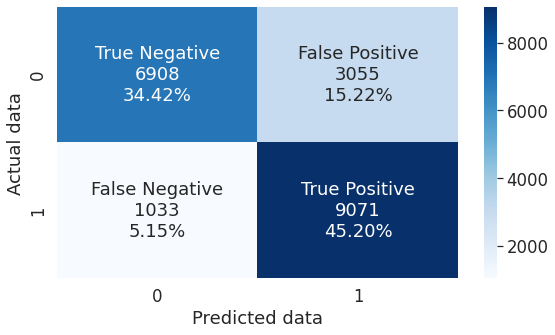

In [ ]:
plt.figure(figsize=(9, 5))

cf_matrix = confusion_matrix(y_test, y_pred1)
group_names = ['True Negative', 'False Positive', 'False Negative',
               'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set(
    xlabel='Predicted data', ylabel='Actual data')

In [ ]:
# test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      9963
           1       0.75      0.90      0.82     10104

    accuracy                           0.80     20067
   macro avg       0.81      0.80      0.79     20067
weighted avg       0.81      0.80      0.79     20067



In [ ]:
print(f'AUC score: {roc_auc_score(y_test, y_pred1)}')
print(f'Recall score: {recall_score(y_test, y_pred1)}')

AUC score: 0.7955643571237331
Recall score: 0.8977632620744259


<h2> Linear SVC </h2>

In [ ]:
# cross validation function
def get_score2(C, max_iter):
  lsvc = LinearSVC(C=C, max_iter=max_iter, random_state=0, dual=False)
  scores = cross_validate(lsvc, X_train, y_train,
                          scoring=('roc_auc', 'recall', 'f1'))
  return scores['test_roc_auc'].mean(), scores['test_recall'].mean(), \
  scores['test_f1'].mean()

In [ ]:
# hyperparameter tuning
C = [1.0, 2.0, 3.0, 4.0, 5.0]
results2 = {}
for i in C:
    results2[i, 1000*i] = get_score2(i, 1000*i)

In [ ]:
cv_results2 = pd.DataFrame(results2).transpose()
cv_results2 = cv_results2.reset_index()
cv_results2 = cv_results2.rename(columns={'level_0': 'C', 'level_1': 'max_iter',
                                          0: 'AUC Score', 1: 'Recall Score', 
                                          2: 'F1 Score'})
cv_results2 = cv_results2.sort_values(by=['Recall Score'], ascending=False)
cv_results2

,C,max_iter,AUC Score,Recall Score,F1 Score
3,4.0,4000.0,0.866106,0.915459,0.810053
4,5.0,5000.0,0.866133,0.915426,0.810072
0,1.0,1000.0,0.865560,0.915360,0.810001
1,2.0,2000.0,0.865560,0.915360,0.810001
2,3.0,3000.0,0.865560,0.915360,0.810001


<h3> Testing set </h2>

In [ ]:
lsvc = LinearSVC(random_state=0, C=4.0, max_iter=4000)

In [ ]:
lsvc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=4.0, max_iter=4000, random_state=0)

In [ ]:
y_pred2 = lsvc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[4335, 5628],
       [ 491, 9613]])

[Text(49.5, 0.5, 'Actual data'), Text(0.5, 13.5, 'Predicted data')]

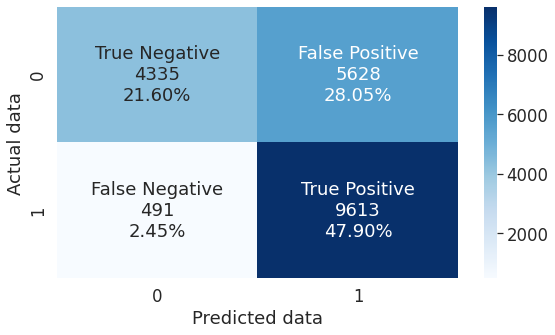

In [ ]:
plt.figure(figsize=(9, 5))

cf_matrix = confusion_matrix(y_test, y_pred2)
group_names = ['True Negative', 'False Positive', 'False Negative',
               'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set(
    xlabel='Predicted data', ylabel='Actual data')

In [ ]:
# test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59      9963
           1       0.63      0.95      0.76     10104

    accuracy                           0.70     20067
   macro avg       0.76      0.69      0.67     20067
weighted avg       0.76      0.70      0.67     20067



In [ ]:
print(f'AUC score: {roc_auc_score(y_test, y_pred2)}')
print(f'Recall score: {recall_score(y_test, y_pred2)}')

AUC score: 0.6932576453304782
Recall score: 0.9514053840063341


<h2> Naive Bayes </h2>

In [ ]:
# cross validation function
def get_score3(var_smoothing):
  gnb = GaussianNB(var_smoothing=var_smoothing)
  scores = cross_validate(gnb, X_train, y_train,
                          scoring=('roc_auc', 'recall', 'f1'))
  return scores['test_roc_auc'].mean(), scores['test_recall'].mean(), \
  scores['test_f1'].mean()

In [ ]:
# hyperparameter tuning
results3 = {}
for i in np.logspace(0, -9, num=100):
    results3[i] = get_score3(i)

In [ ]:
cv_results3 = pd.DataFrame(results3).transpose()
cv_results3 = cv_results3.reset_index()
cv_results3 = cv_results3.rename(columns={'index': 'var_smoothing',
                                          0: 'AUC Score', 1: 'Recall Score', 
                                          2: 'F1 Score'})
cv_results3 = cv_results3.sort_values(by=['Recall Score'], ascending=False)
cv_results3.head()

,var_smoothing,AUC Score,Recall Score,F1 Score
94,2.848036e-09,0.841705,0.682856,0.734833
96,1.873817e-09,0.841813,0.682823,0.734823
95,2.310130e-09,0.841754,0.682823,0.734811
93,3.511192e-09,0.841660,0.682790,0.734776
97,1.519911e-09,0.841881,0.682790,0.734932


<h3> Testing set </h3>

In [ ]:
gnb = GaussianNB(var_smoothing=2.848036e-09)

In [ ]:
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=2.848036e-09)

In [ ]:
y_pred3 = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred3)

array([[8171, 1792],
       [3146, 6958]])

[Text(49.5, 0.5, 'Actual data'), Text(0.5, 13.5, 'Predicted data')]

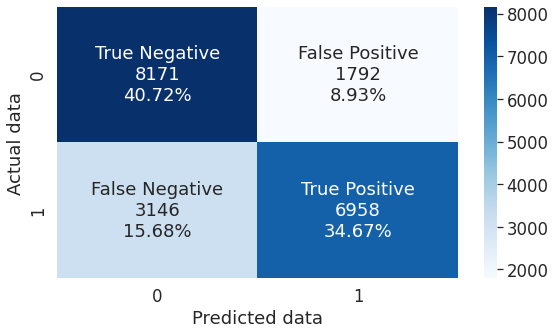

In [ ]:
plt.figure(figsize=(9, 5))

cf_matrix = confusion_matrix(y_test, y_pred3)
group_names = ['True Negative', 'False Positive', 'False Negative',
               'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set(
    xlabel='Predicted data', ylabel='Actual data')

In [ ]:
# test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77      9963
           1       0.80      0.69      0.74     10104

    accuracy                           0.75     20067
   macro avg       0.76      0.75      0.75     20067
weighted avg       0.76      0.75      0.75     20067



In [ ]:
print(f'AUC score: {roc_auc_score(y_test, y_pred3)}')
print(f'Recall score: {recall_score(y_test, y_pred3)}')

AUC score: 0.754386330372497
Recall score: 0.6886381631037213


<h2> Random Forest Classifier </h2>

In [ ]:
# cross validation function
def get_score4(n_estimators, max_depth):
  rfc = RandomForestClassifier(n_estimators=n_estimators, 
                               random_state=0, max_depth=max_depth)
  scores = cross_validate(rfc, X_train, y_train,
                          scoring=('roc_auc', 'recall', 'f1'))
  return scores['test_roc_auc'].mean(), scores['test_recall'].mean(), \
  scores['test_f1'].mean()

In [ ]:
# hyperparameter tuning
results4 = {}
for i in range(1, 6):
    results4[100*i, 10*i] = get_score4(100*i, 10*i)

In [ ]:
cv_results4 = pd.DataFrame(results4).transpose()
cv_results4 = cv_results4.reset_index()
cv_results4 = cv_results4.rename(columns={'level_0': 'n_estimators', 
                                          'level_1': 'max_depth',
                                          0: 'AUC Score', 1: 'Recall Score', 
                                          2: 'F1 Score'})
cv_results4 = cv_results4.sort_values(by=['Recall Score'], ascending=False)
cv_results4

,n_estimators,max_depth,AUC Score,Recall Score,F1 Score
4,500,50,0.995077,0.960415,0.968182
3,400,40,0.995072,0.960150,0.968092
2,300,30,0.995039,0.960150,0.967833
1,200,20,0.994950,0.960017,0.968104
0,100,10,0.994090,0.953851,0.964659


parameter terbaik untuk Random Forest Classifier adalah n_estimators=500 dan max_depth=50

<h3> Testing set </h3>

In [ ]:
rfc = RandomForestClassifier(max_depth=50, n_estimators=500, random_state=0)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=500, random_state=0)

In [ ]:
y_pred4 = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred4)

array([[9719,  244],
       [ 405, 9699]])

[Text(49.5, 0.5, 'Actual data'), Text(0.5, 13.5, 'Predicted data')]

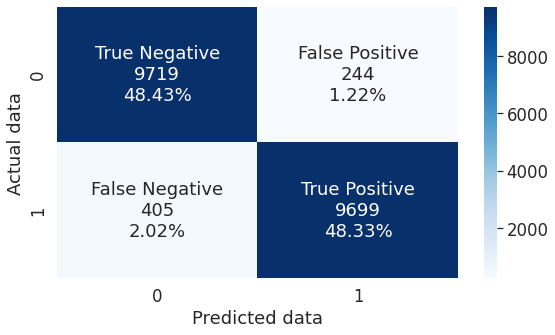

In [ ]:
plt.figure(figsize=(9, 5))

cf_matrix = confusion_matrix(y_test, y_pred4)
group_names = ['True Negative', 'False Positive', 'False Negative',
               'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.set(font_scale=1.5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set(
    xlabel='Predicted data', ylabel='Actual data')

In [ ]:
# test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9963
           1       0.98      0.96      0.97     10104

    accuracy                           0.97     20067
   macro avg       0.97      0.97      0.97     20067
weighted avg       0.97      0.97      0.97     20067



In [ ]:
print(f'AUC score: {roc_auc_score(y_test, y_pred4)}')
print(f'Recall score: {recall_score(y_test, y_pred4)}')

AUC score: 0.9677131246657764
Recall score: 0.959916864608076


Assessments terbaru setelah dilakukan cross validation + hyperparameter tuning

In [ ]:
print("Logistic Regression:")
print(f'AUC score: {roc_auc_score(y_test, y_pred1)}')
print(f'Recall score: {recall_score(y_test, y_pred1)}\n')
print("Linear SVC:")
print(f'AUC score: {roc_auc_score(y_test, y_pred2)}')
print(f'Recall score: {recall_score(y_test, y_pred2)}\n')
print("Naive Bayes:")
print(f'AUC score: {roc_auc_score(y_test, y_pred3)}')
print(f'Recall score: {recall_score(y_test, y_pred3)}\n')
print("Random Forest Classifier:")
print(f'AUC score: {roc_auc_score(y_test, y_pred4)}')
print(f'Recall score: {recall_score(y_test, y_pred4)}\n')

Logistic Regression:
AUC score: 0.7955643571237331
Recall score: 0.8977632620744259

Linear SVC:
AUC score: 0.6932576453304782
Recall score: 0.9514053840063341

Naive Bayes:
AUC score: 0.754386330372497
Recall score: 0.6886381631037213

Random Forest Classifier:
AUC score: 0.9677131246657764
Recall score: 0.959916864608076



dari keempat model, assessment terbaik adalah Random Forest Classifier. <br>
Maka, kami akan menggunakan model ini untuk prediksi churn

<h1> Week 6: Final</h1>

<h2> Feature importance </h2>

In [ ]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=0, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
feature_names = X_res.columns
forest_importances = pd.Series(result.importances_mean, index=feature_names)

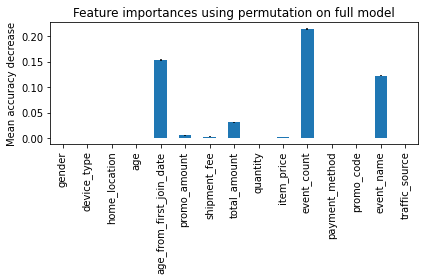

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

terlihat bahwa terdapat beberapa feature yang penting untuk model Random Forest Classifier, di antaranya age_from_first_join_date, total_amount, event_name dan event_count. <br>
Maka, kita akan menggunakan feature-feature tersebut untuk analisis churn vs non churn

<h2> Churn vs non churn </h2>

<h3> age_from_first_join_date </h3>

In [ ]:
df2.head()

,customer_id,gender,device_type,home_location,age,age_from_first_join_date,promo_amount,shipment_fee,total_amount,quantity,item_price,event_count,payment_method,promo_code,event_name,traffic_source,churned
0,3,M,Android,Jakarta Raya,36,4,2570.652174,6811.594203,658950.478261,1.0,242216.420290,1021,Credit Card,WEEKENDSERU,ADD_TO_CART,MOBILE,1
1,8,F,Android,Sulawesi Utara,22,1,962.375000,6875.000000,594825.125000,2.0,252154.875000,221,Credit Card,WEEKENDSERU,HOMEPAGE,MOBILE,1
2,9,F,Android,Jakarta Raya,16,1,0.000000,5625.000000,514203.750000,1.0,308843.125000,94,Gopay,NaN,ADD_TO_CART,MOBILE,1
3,11,M,Android,Kalimantan Timur,29,0,9492.000000,15000.000000,197533.000000,1.0,192025.000000,14,OVO,XX2022,ADD_TO_CART,MOBILE,1
4,15,F,Android,Jawa Barat,39,3,1818.000000,10000.000000,716360.666667,1.0,233470.222222,109,LinkAja,BUYMORE,ADD_TO_CART,MOBILE,1


In [ ]:
age_from_first_join_date_0 = df2[['age_from_first_join_date', 'churned']][df2['churned']==0]

[Text(0.5, 1.0, 'not churned')]

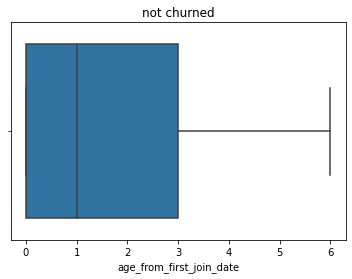

In [ ]:
sns.boxplot(data=age_from_first_join_date_0, x='age_from_first_join_date').set(
    title='not churned')

In [ ]:
age_from_first_join_date_1 = df2[['age_from_first_join_date', 'churned']][df2['churned']==1]

[Text(0.5, 1.0, 'churned')]

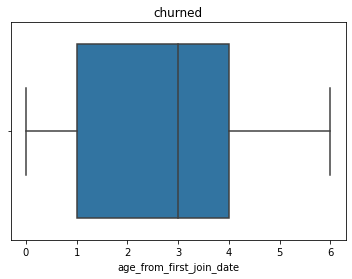

In [ ]:
sns.boxplot(data=age_from_first_join_date_1, x='age_from_first_join_date').set(
    title='churned')

terlihat bahwa churned customer memiliki rata-rata umur 3 tahun sedangkan non churned customer memiliki rata-rata umur 1 tahun.

<h3> event_count </h3>

In [ ]:
event_count_0 = df2[['event_count', 'churned']][df2['churned']==0]

[Text(0.5, 1.0, 'not churned')]

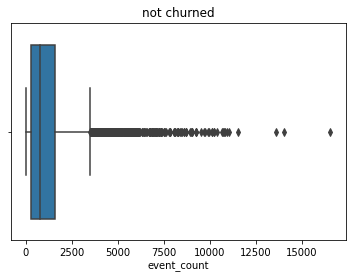

In [ ]:
sns.boxplot(data=event_count_0, x='event_count').set(
    title='not churned')

In [ ]:
from scipy.stats import iqr
iqr([event_count_0['event_count']])

1286.75

In [ ]:
event_count_1 = df2[['event_count', 'churned']][df2['churned']==1]

[Text(0.5, 1.0, 'churned')]

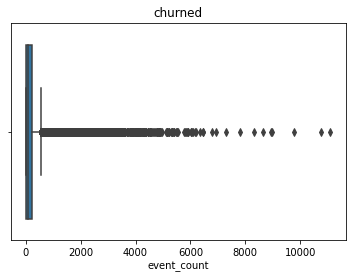

In [ ]:
sns.boxplot(data=event_count_1, x='event_count').set(
    title='churned')

In [ ]:
from scipy.stats import iqr
iqr([event_count_1['event_count']])

211.0

terlihat bahwa churned customer memiliki interaksi rata-rata sebanyak 211 kali sedangkan non churned customer memiliki interaksi rata-rata sebanyak 1287 kali.

<h3> event_name </h3>

In [ ]:
event_name_0 = df2[['event_name', 'churned']][df2['churned']==0]

[Text(0.5, 1.0, 'not churned')]

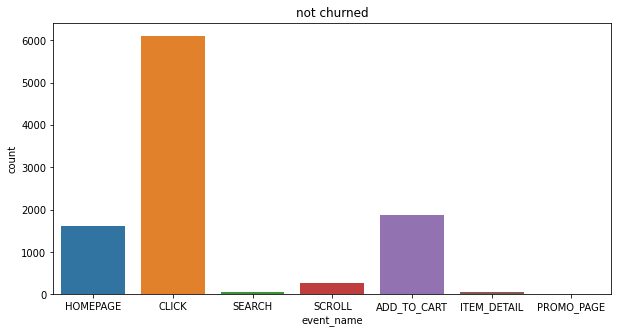

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=event_name_0, x='event_name').set(
    title='not churned')

In [ ]:
event_name_1 = df2[['event_name', 'churned']][df2['churned']==1]

[Text(0.5, 1.0, 'churned')]

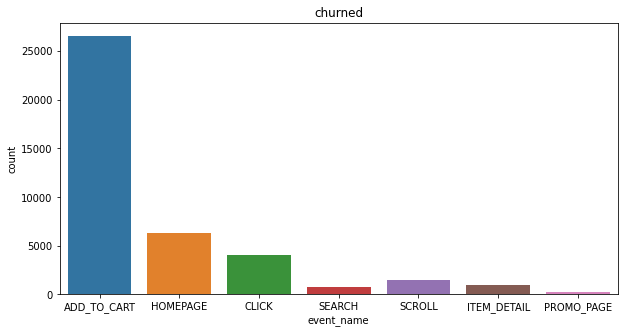

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=event_name_1, x='event_name').set(
    title='churned')

terlihat bahwa churned customer paling banyak event terakhirnya adalah ADD_TO_CART sedangkan non churned customer paling banyak event terakhirnya adalah CLICK. <br>
ADD_TO_CART merupakan event di mana customer menambahkan item ke keranjang sedangkan CLICK merupakan event di mana customer melakukan klik di platform baik web maupun mobile.

<h3> total_amount </h3>

In [ ]:
total_amount_0 = df2[['total_amount', 'churned']][df2['churned']==0]

[Text(0.5, 1.0, 'not churned')]

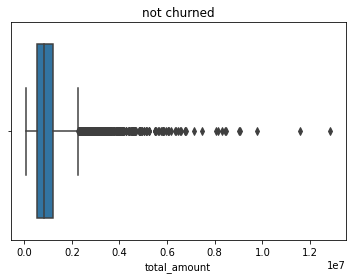

In [ ]:
#plt.figure(figsize=(10, 5))
sns.boxplot(data=total_amount_0, x='total_amount').set(
    title='not churned')

In [ ]:
from scipy.stats import iqr
iqr([total_amount_0['total_amount']])

696312.2966341043

In [ ]:
# Upper fence
IQR = iqr([total_amount_0['total_amount']])
Q3 = total_amount_0['total_amount'].quantile(0.75)
Q3 + (1.5 * IQR)

2274005.3025900456

In [ ]:
total_amount_1 = df2[['total_amount', 'churned']][df2['churned']==1]

[Text(0.5, 1.0, 'churned')]

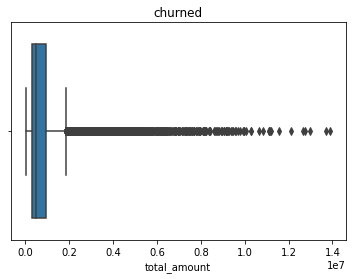

In [ ]:
#plt.figure(figsize=(10, 5))
sns.boxplot(data=total_amount_1, x='total_amount').set(
    title='churned')

In [ ]:
from scipy.stats import iqr
iqr([total_amount_1['total_amount']])

628122.4816017316

In [ ]:
# Upper fence
IQR = iqr([total_amount_1['total_amount']])
Q3 = total_amount_1['total_amount'].quantile(0.75)
Q3 + (1.5 * IQR)

1872860.2873376624

terlihat bahwa churned customer memiliki rata-rata total pengeluaran adalah Rp628.122,00 sedangkan non churned customer Rp696.312,00.

<h2> Rekomendasi untuk Fashion Campus dalam mengurangi churn </h2>

1. Berdasarkan umur customer dari pertama kali mendaftar di Fashion Campus, terlihat bahwa churned customer memiliki rata-rata umur 3 tahun sedangkan non churned customer memiliki rata-rata umur 1 tahun. <br>
Kemungkinan kebanyakan churned customer, walaupun sudah lama mendaftar, menjadi jenuh karena tidak mendapat pelayanan yang semestinya sebagai pelanggan lama. <br>
Maka, Fashion Campus dapat membuat program loyalitas di mana bagi pelanggan lama dapat mendapatkan keistimewaan yang tidak dimiliki oleh pengguna baru seperti diskon, barang eksklusif dan sebagainya. <br>

2. Berdasarkan event_count (banyaknya interaksi customer terhadap platform Fashion Campus, baik web maupun mobile), terlihat bahwa churned customer memiliki interaksi rata-rata sebanyak 211 kali sedangkan non churned customer memiliki interaksi rata-rata sebanyak 1287 kali. <br>
Rendahnya interaksi rata-rata dari churned customer dapat disebabkan oleh platform yang kurang diminati oleh customer. <br>
Maka, Fashion Campus dapat memperbaiki dan meningkatkan kualitas platform baik di web maupun mobile seperti peningkatan UI/UX, pembuatan UI/UX yang sesuai dengan yang disukai target umur Fashion Campus (15-35 tahun) agar customer betah, dan sebagainya. <br>

3. Berdasarkan event terakhir yang dilakukan oleh customer, terlihat bahwa churned customer paling banyak event terakhirnya adalah ADD_TO_CART sedangkan non churned customer paling banyak event terakhirnya adalah CLICK. <br>
ADD_TO_CART merupakan event di mana customer menambahkan item ke keranjang sedangkan CLICK merupakan event di mana customer melakukan klik di platform baik web maupun mobile. <br>
Churned customer kebanyakan hanya memasukkan item-item yang mereka sukai namun belum sampai ke tahap booking (pemesanan).<br>
Maka, Fashion Campus dapat melakukan beberapa hal ketika customer memasukkan item-item ke keranjang, seperti penawaran diskon dengan syarat adanya waktu terbatas agar customer segera membeli, mengingatkan customer bahwa barang yang ada di item akan segera habis bila tidak segera dibeli, dan sebagainya.<br>

4. Berdasarkan total pengeluaran yang harus dibayar customer ketika membeli item, terlihat bahwa rata-rata churned customer maupun non churned customer hampir sama. <br>
Churned customer memiliki rata-rata total pengeluaran adalah Rp628.122,00 sedangkan non churned customer Rp696.312,00. Rata-rata churned customer lebih rendah daripada non churned customer.<br>
Dapat dikatakan bahwa churned customer menyukai pembelian dengan total sekitar 600 ribuan.<br>
Maka, Fashion Campus dapat memberikan perhatian khusus terhadap customer yang membeli item dengan rata-rata 600 ribuan, seperti peningkatan kualitas item dengan harga di bawah 600 ribuan, dan sebagainya.